# Assignment_1

1. Continuous time signal
Basic signal
Consider the following signal with basic transformations of the form y(t) = a x(b t + c), where a is the amplitude scaling factor, b is the time scaling factor, and c is the time shift. Plot the following signals (make sure that each section will be on a single subplot):

                           x1(t) = u(t) = 0,    t < 0
                                          1,    0 ≤ t ≤ 20

                           x2(t) = r(t) = t u(t)

                           x3(t) = p(t) = t^2 u(t)/2

                           x4(t) = rect(t/T)

                           x5(t) = rect(t/T)*rect(t/T)

                           x6(t) = sinc(t) = sin(πt)/πt

                           x7(t) = 0,             t<0
                                   t-d1/d2-d1,    d1 ≤ t ≤ d2
                                   d3-t/d3-d2,    d2 ≤ t ≤ d3
                                   0,             d3 ≤ t

where u(t) is the unit impulse signal, r(t) is the ramp signal, p(t) is the parabolic signal, rect(t/T) is a rectangular pulse between -T/2 and T/2. In x7(t) choose d1 = 3, d2 = 10, d3 = 15.

In [1]:
# impoting the useful libreries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining the function to generate unit step
def step_funct(a,c,t):
    unit =[]
    for sample in t:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a)
    return unit

# defining the function to generate ramp signal
def ramp_funct(a,c,t):
    ramp =[]
    for sample in t:
        if sample < c:
            ramp.append(0)
        else:
            ramp.append(a*sample)
    return ramp

# defining the function to generate parabolic signal
def parabolic_funct(a,c,t):
    parabolic =[]
    for sample in t:
        if sample < c:
            parabolic.append(0)
        else:
            parabolic.append(a*(((sample)**2)/2))
    return parabolic

# defining the function to generate rectangle pulse
def rect_funct(a,c,t,T):
    rect =[]
    for sample in t:
        if sample < c-T/2:
            rect.append(0)
        elif sample > c+T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

# defining the function to convolve two signals.
def convolution_1(x1,x2):
    m = len(x1)
    n = len(x2)
    output = []
    for i in range(1,m+1):
        output.append(sum(np.multiply(x1[0:i],x2[n-i:n])))
    for j in range(1,n):
        output.append(sum(np.multiply(x1[j:m],x2[0:n-j])))
    return output

# defining the function to generate sinc signal
def sinc_function(t):
    sinc = []
    for sample in t:
        y = np.sin(np.pi*sample)/(np.pi*sample)
        sinc.append(y)
    return sinc
# function to generate signal x7.
def x_7_function(t,d1,d2,d3):
    output = []
    for sample in t:
        if sample < 0:
            output.append(0)
        elif sample >= d1 and sample <= d2:
            output.append((sample-d1)/(d2-d1))
        elif sample > d2 and sample <= d3:
            output.append((d3-sample)/(d3-d2))
        elif sample > d3:
            output.append(0)
        else:
            output.append(0)
    return output

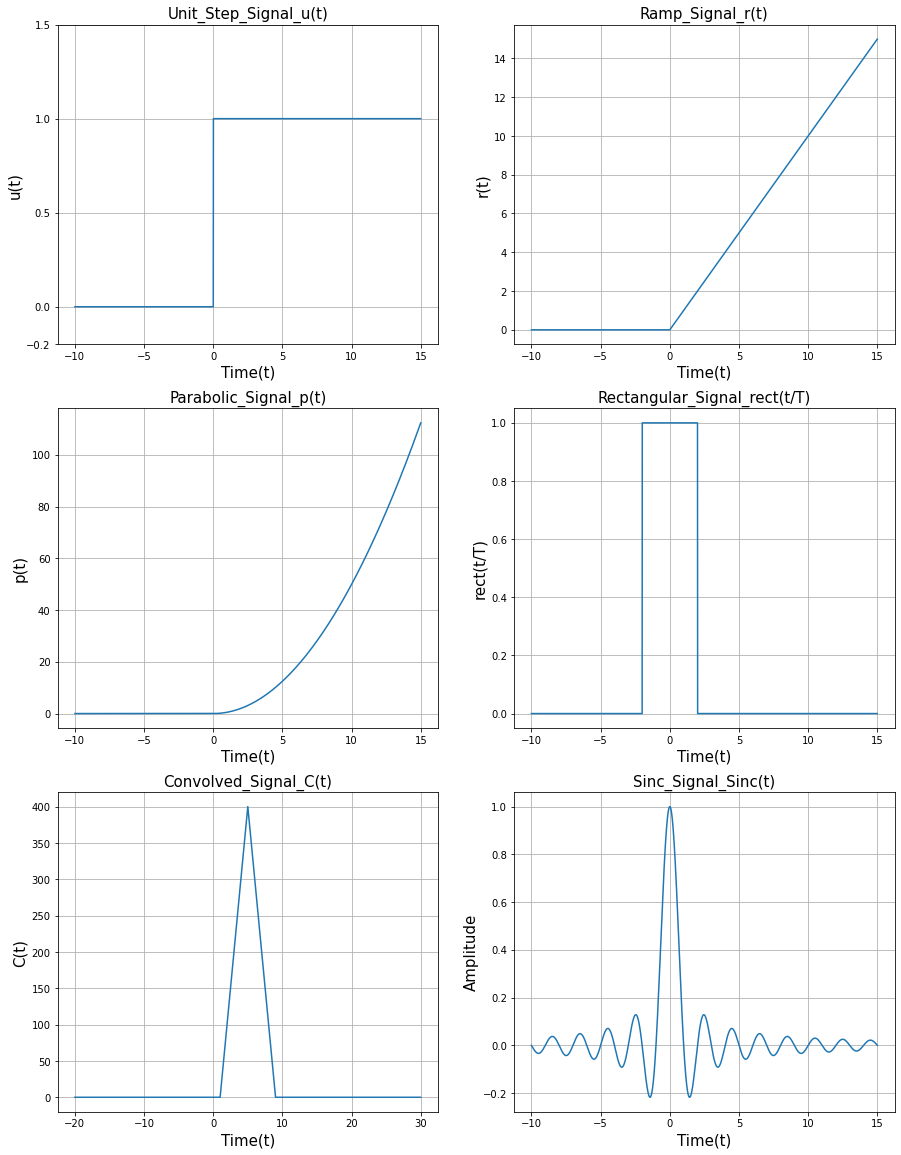

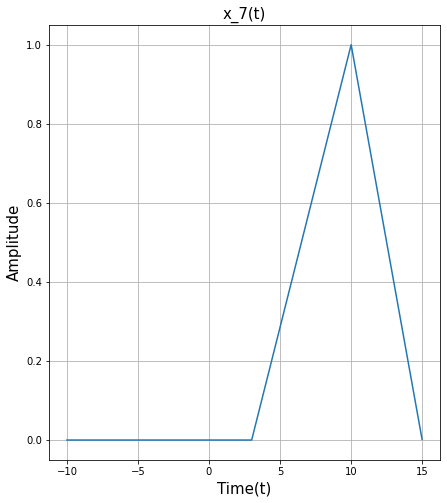

In [3]:
a=1
c=0
t=np.arange(-10,15,0.01)
T=4
fig, axes = plt.subplots(3,2,figsize=(15, 20));
axes[0,0].plot(t,step_funct(a,c,t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('u(t)',fontsize=15)
axes[0,0].set_title('Unit_Step_Signal_u(t)',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,1].plot(t,ramp_funct(a,c,t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('r(t)',fontsize=15)
axes[0,1].set_title('Ramp_Signal_r(t)',fontsize=15)
axes[1,0].plot(t,parabolic_funct(a,c,t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('p(t)',fontsize=15)
axes[1,0].set_title('Parabolic_Signal_p(t)',fontsize=15)
axes[1,1].plot(t,rect_funct(a,c,t,T))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('rect(t/T)',fontsize=15)
axes[1,1].set_title('Rectangular_Signal_rect(t/T)',fontsize=15)
x1=rect_funct(a,c,t,T)
x2=rect_funct(a,c,t,T)
t1=np.arange(-19.995,29.995,0.01)
axes[2,0].plot(t1,convolution_1(x1,x2))
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('C(t)',fontsize=15)
axes[2,0].set_title('Convolved_Signal_C(t)',fontsize=15)
axes[2,1].plot(t,sinc_function(t))
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('Amplitude',fontsize=15)
axes[2,1].set_title('Sinc_Signal_Sinc(t)',fontsize=15)
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
axes[2,0].grid()
axes[2,1].grid()
plt.subplots(figsize=(7,8))
d1 = 3
d2 = 10
d3 = 15
plt.plot(t,x_7_function(t,d1,d2,d3))
plt.xlabel('Time(t)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('x_7(t)',fontsize=15)
plt.grid()


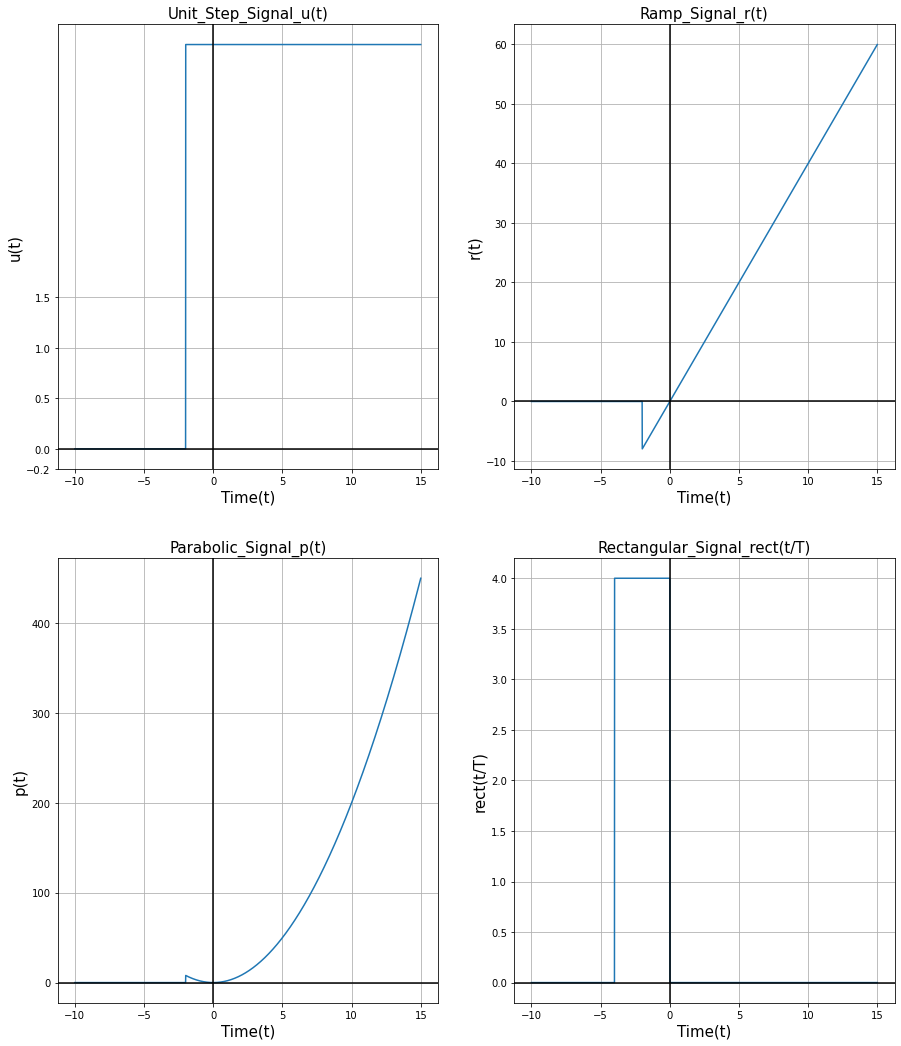

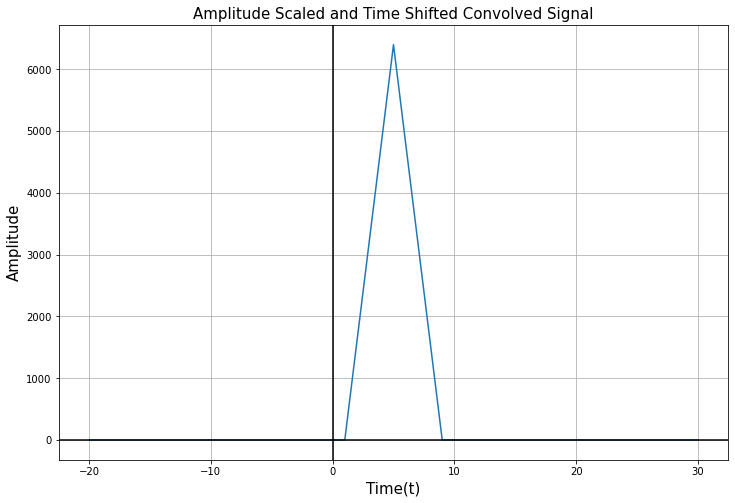

In [4]:
# drawing amplitude scaled and time shifted versions of signals x1 to x5 with amp. scaling factor a = 4 and time shift c = −2.
a=4
c=-2
t=np.arange(-10,15,0.01)
T=4
fig, axes = plt.subplots(2,2,figsize=(15,18));
axes[0,0].plot(t,step_funct(a,c,t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('u(t)',fontsize=15)
axes[0,0].set_title('Unit_Step_Signal_u(t)',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,1].plot(t,ramp_funct(a,c,t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('r(t)',fontsize=15)
axes[0,1].set_title('Ramp_Signal_r(t)',fontsize=15)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[1,0].plot(t,parabolic_funct(a,c,t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('p(t)',fontsize=15)
axes[1,0].set_title('Parabolic_Signal_p(t)',fontsize=15)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,1].plot(t,rect_funct(a,c,t,T))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('rect(t/T)',fontsize=15)
axes[1,1].set_title('Rectangular_Signal_rect(t/T)',fontsize=15)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
plt.subplots(figsize=(12, 8));
x1=rect_funct(a,c,t,T)
x2=rect_funct(a,c,t,T)
t1=np.arange(-19.995,29.995,0.01)
plt.plot(t1,convolution_1(x1,x2))
plt.xlabel('Time(t)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Amplitude Scaled and Time Shifted Convolved Signal',fontsize=15)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

Finally, plotting the time scaled versions of the signals x1(t), x2(t) and x3(t) with time scaling factor as b = 0.5 and −1

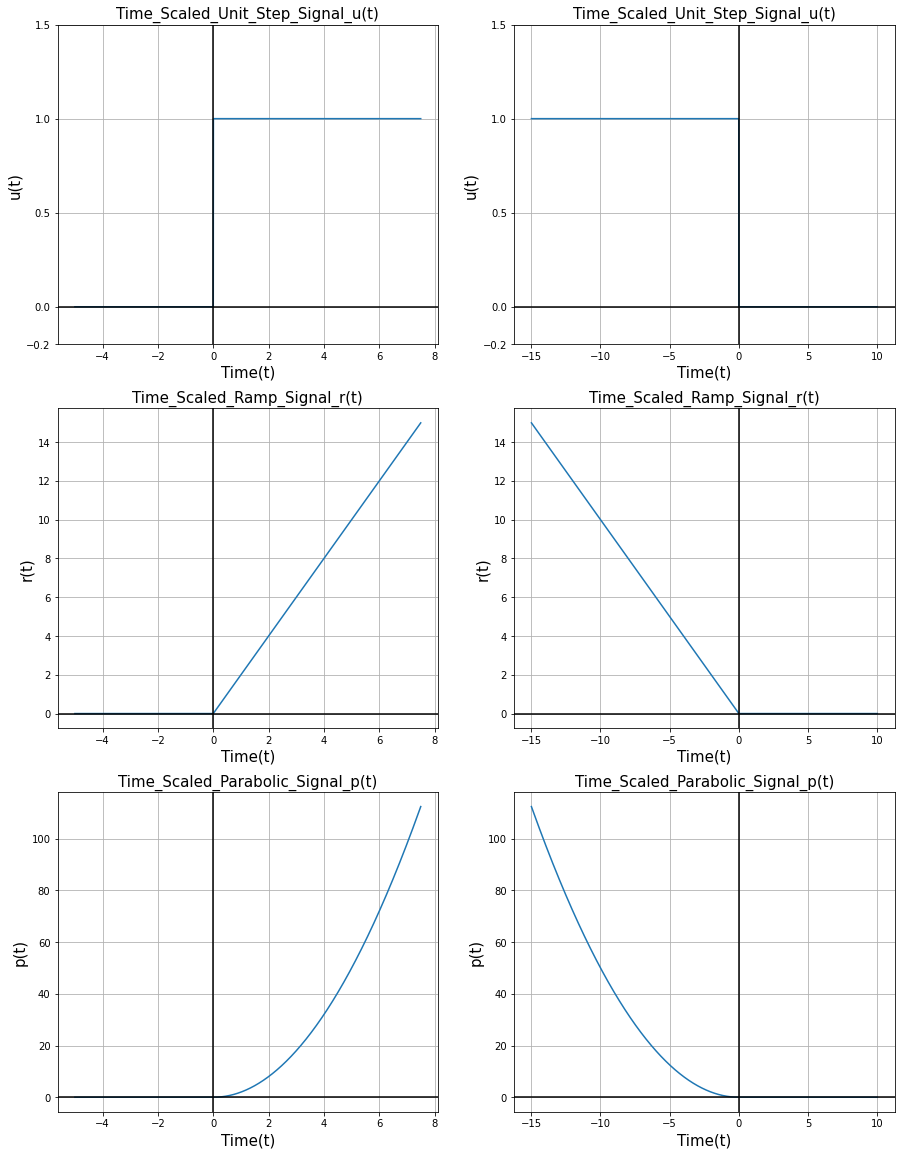

In [5]:
fig, axes = plt.subplots(3,2,figsize=(15, 20));
a = 1
b = 0.5
c = 0
axes[0,0].plot(b*t,step_funct(a,c,t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('u(t)',fontsize=15)
axes[0,0].set_title('Time_Scaled_Unit_Step_Signal_u(t)',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");

b = -1
axes[0,1].plot(b*t,step_funct(a,c,t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('u(t)',fontsize=15)
axes[0,1].set_title('Time_Scaled_Unit_Step_Signal_u(t)',fontsize=15)
axes[0,1].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
b = 0.5
axes[1,0].plot(b*t,ramp_funct(a,c,t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('r(t)',fontsize=15)
axes[1,0].set_title('Time_Scaled_Ramp_Signal_r(t)',fontsize=15)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");

b = -1
axes[1,1].plot(b*t,ramp_funct(a,c,t))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('r(t)',fontsize=15)
axes[1,1].set_title('Time_Scaled_Ramp_Signal_r(t)',fontsize=15)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
b=0.5
axes[2,0].plot(b*t,parabolic_funct(a,c,t))
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('p(t)',fontsize=15)
axes[2,0].set_title('Time_Scaled_Parabolic_Signal_p(t)',fontsize=15)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
b=-1
axes[2,1].plot(b*t,parabolic_funct(a,c,t))
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('p(t)',fontsize=15)
axes[2,1].set_title('Time_Scaled_Parabolic_Signal_p(t)',fontsize=15)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
axes[2,0].grid()
axes[2,1].grid()


# Exponential Signals

Consider a signal of the form: x(t) = A e−B t. Plot x(t) for different values of A and B. Choose A = 10 and −10; B ∈ {−5, −2.5, −0.5, 0, 1, 3}. Plot for all combinations of A and B and understand the behaviour of exponential signals.

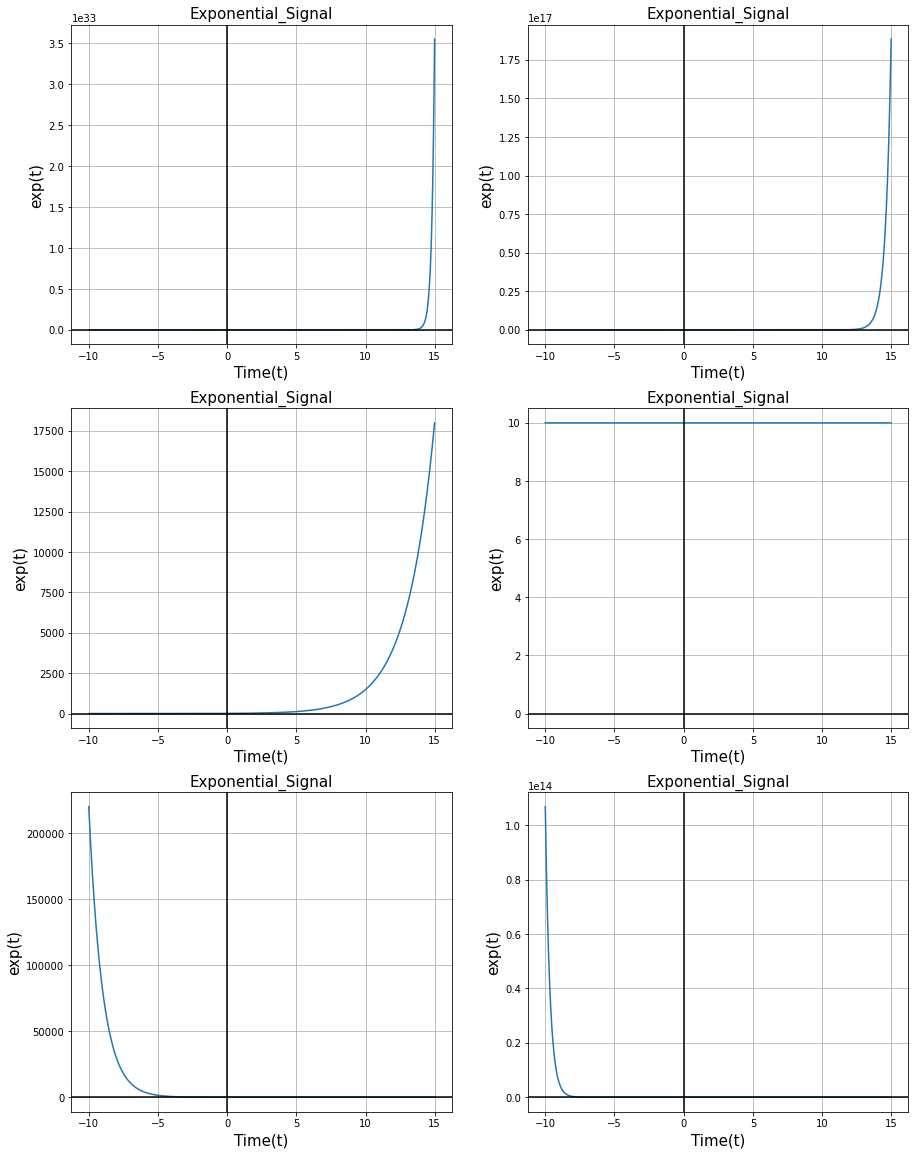

In [6]:
# defining the function to generate exponential signal
def exponential_function(A,B,t):
    exponent = []
    for sample in t:
        y = A*np.exp(-B*sample)
        exponent.append(y)
    return exponent

# Plotting the exponential signal with A=10 and B={-5,-2.5,-0.5,0,1,3}
A=10
fig, axes = plt.subplots(3,2,figsize=(15, 20));
B=-5
axes[0,0].plot(t,exponential_function(A,B,t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('exp(t)',fontsize=15)
axes[0,0].set_title('Exponential_Signal',fontsize=15)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()
B=-2.5
axes[0,1].plot(t,exponential_function(A,B,t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('exp(t)',fontsize=15)
axes[0,1].set_title('Exponential_Signal',fontsize=15)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()
B=-0.5
axes[1,0].plot(t,exponential_function(A,B,t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('exp(t)',fontsize=15)
axes[1,0].set_title('Exponential_Signal',fontsize=15)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()
B=0
axes[1,1].plot(t,exponential_function(A,B,t))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('exp(t)',fontsize=15)
axes[1,1].set_title('Exponential_Signal',fontsize=15)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()

B=1
axes[2,0].plot(t,exponential_function(A,B,t))
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('exp(t)',fontsize=15)
axes[2,0].set_title('Exponential_Signal',fontsize=15)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()
B=3
axes[2,1].plot(t,exponential_function(A,B,t))
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('exp(t)',fontsize=15)
axes[2,1].set_title('Exponential_Signal',fontsize=15)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()



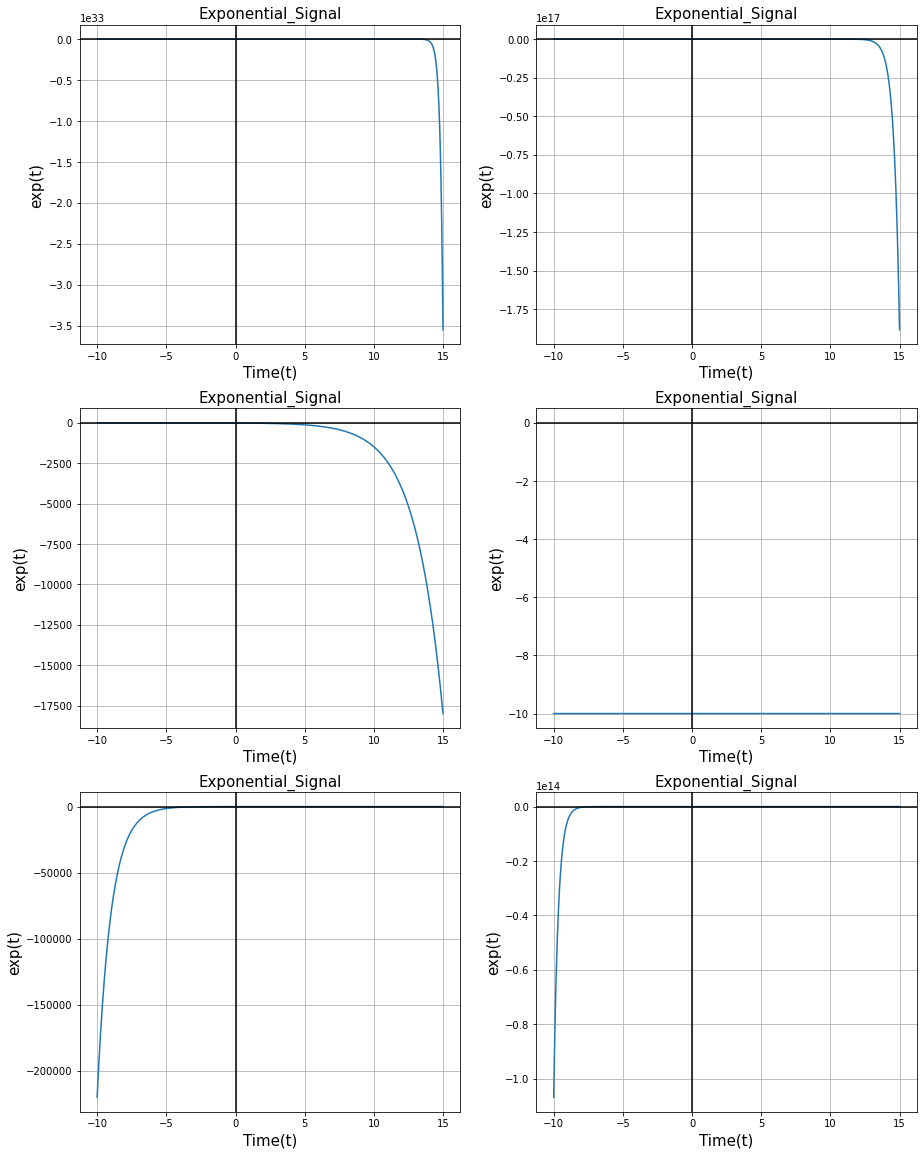

In [7]:
# Plotting the exponential signal with A=-10 and B={-5,-2.5,-0.5,0,1,3}
A=-10
fig, axes = plt.subplots(3,2,figsize=(15, 20));
B=-5
axes[0,0].plot(t,exponential_function(A,B,t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('exp(t)',fontsize=15)
axes[0,0].set_title('Exponential_Signal',fontsize=15)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()
B=-2.5
axes[0,1].plot(t,exponential_function(A,B,t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('exp(t)',fontsize=15)
axes[0,1].set_title('Exponential_Signal',fontsize=15)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()
B=-0.5
axes[1,0].plot(t,exponential_function(A,B,t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('exp(t)',fontsize=15)
axes[1,0].set_title('Exponential_Signal',fontsize=15)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()
B=0
axes[1,1].plot(t,exponential_function(A,B,t))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('exp(t)',fontsize=15)
axes[1,1].set_title('Exponential_Signal',fontsize=15)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()

B=1
axes[2,0].plot(t,exponential_function(A,B,t))
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('exp(t)',fontsize=15)
axes[2,0].set_title('Exponential_Signal',fontsize=15)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()
B=3
axes[2,1].plot(t,exponential_function(A,B,t))
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('exp(t)',fontsize=15)
axes[2,1].set_title('Exponential_Signal',fontsize=15)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

# Complex Exponentials

(i) Consider a signal of the form: y(t) = αe−βt cos(ω t + ϕ). Plot the signals for α = (0.5, −2), β = (−0.25, 1), ω = (π, π/4, 4π/3), and ϕ is uniformly distributed between −π and π.

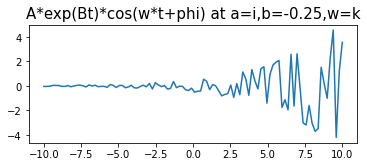

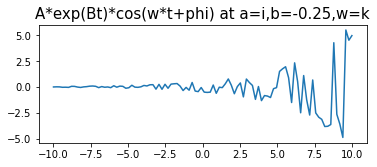

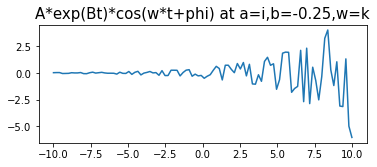

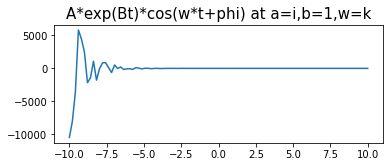

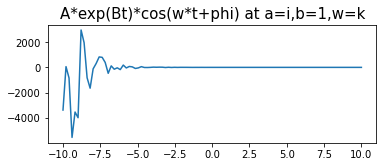

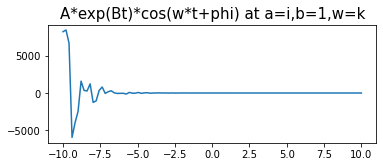

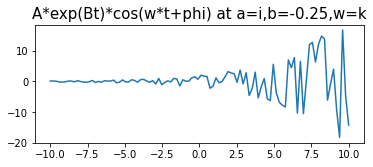

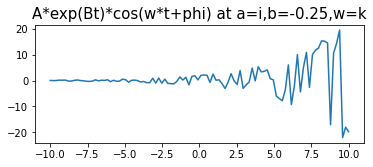

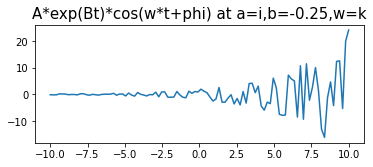

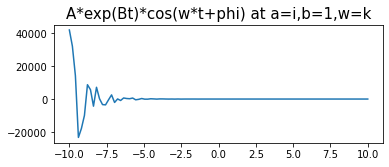

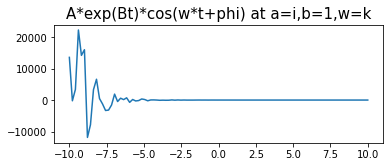

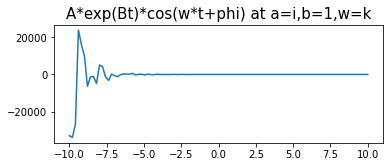

<Figure size 432x288 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
a=[0.5,-2]
b=[-0.25,1]
w=[np.pi,(np.pi/4),(4*np.pi/3)]
phi=np.random.uniform(-np.pi,np.pi,100)
t=np.linspace(-10,10,100)
x=1
for i in a:
    for j in b:
        for k in w:
            y=i*np.exp(-j*t)*np.cos(k*t+phi)
            plt.figure(figsize = (20,10))
            plt.subplot(4,3,x)
            plt.plot(t,y)
            x+=1
            plt.gca().set_title('A*exp(Bt)*cos(w*t+phi) at a=i'+','+'b=' + str(j) +','+ 'w=k',size=15)
            
            
plt.show()
plt.tight_layout()           


(ii) Consider a signal of the form: y(t) = αej(ωt+ϕ). Plot Re(y(t)), Im(y(t)), |y(t)|, ∠y(t) when (α, ω, ϕ) = (1,0.14π, −π/3), (2, 0.34π, −π/2), and (2, 0.75π, π).

In [9]:
# function to generate real part of complex exponential signal.
def real_value_function(α,ω,ϕ,t):
    cosine = []
    for sample in t:
        y = α*np.cos((ω*sample)+ϕ)
        cosine.append(y)
    return cosine


# function to generate imaginary part of complex exponential signal.
def imaginary_value_function(α,ω,ϕ,t):
    sine = []
    for sample in t:
        y = α*np.sin((ω*sample)+ϕ)
        sine.append(y)
    return sine


# function to generate megnitude of complex exponential signal.
def magnitude_function(α,ω,ϕ,t):
    mag_exp = [];
    for sample in t:
        y = α*(np.exp(1j*((ω*sample)+ϕ)))
        mag_exp.append(y);
    return np.abs(mag_exp)


# function to generate angle of complex exponential signal.
def angle_function(α,ω,ϕ,t):
    ang_exp = [];
    for sample in t:
        y = α*(np.exp(1j*((ω*sample)+ϕ)))
        ang_exp.append(y);
    return np.angle(ang_exp)


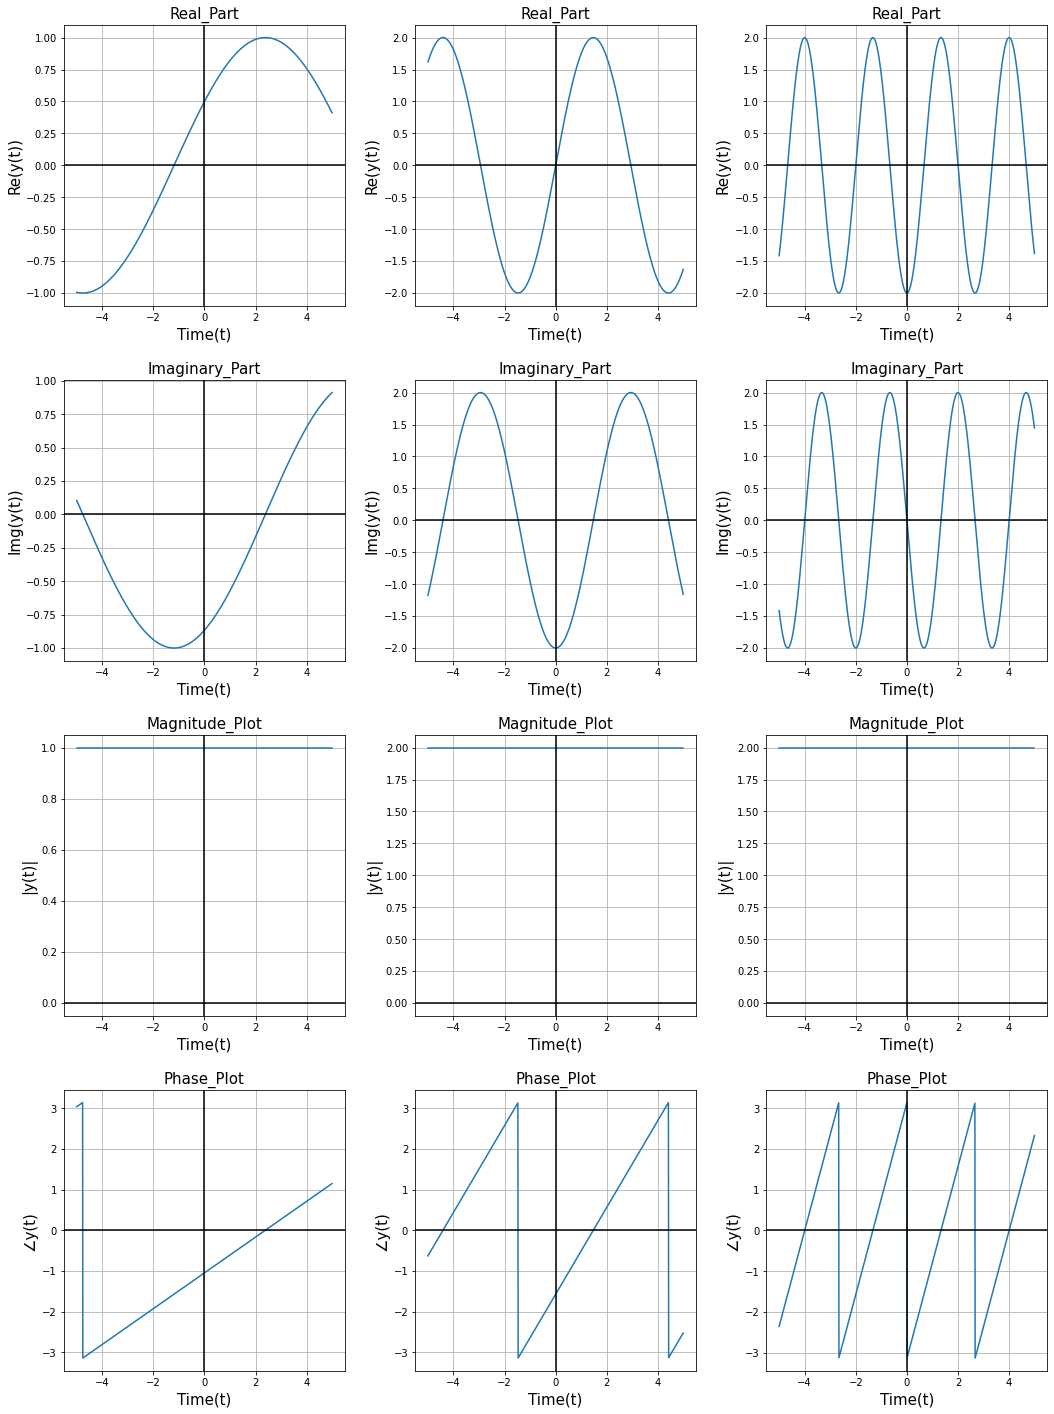

In [10]:
fig, axes = plt.subplots(4,3,figsize=(15, 20));
t = np.arange(-5,5,0.01)
α = 1
ϕ = -np.pi/3
ω= 0.14*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,t)
axes[0,0].plot(t,rvf)
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('Re(y(t))',fontsize=15)
axes[0,0].set_title('Real_Part',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,t)
axes[1,0].plot(t,ivf)
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('Img(y(t))',fontsize=15)
axes[1,0].set_title('Imaginary_Part',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,t)
axes[2,0].plot(t,mf)
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('|y(t)|',fontsize=15)
axes[2,0].set_title('Magnitude_Plot',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,t)
axes[3,0].plot(t,af)
axes[3,0].set_xlabel('Time(t)',fontsize=15)
axes[3,0].set_ylabel('∠y(t)',fontsize=15)
axes[3,0].set_title('Phase_Plot',fontsize=15)
axes[3,0].axhline(color = "Black")
axes[3,0].axvline(color = "Black")
axes[3,0].grid()


α = 2
ϕ = -np.pi/2
ω= 0.34*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,t)
axes[0,1].plot(t,rvf)
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('Re(y(t))',fontsize=15)
axes[0,1].set_title('Real_Part',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,t)
axes[1,1].plot(t,ivf)
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('Img(y(t))',fontsize=15)
axes[1,1].set_title('Imaginary_Part',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,t)
axes[2,1].plot(t,mf)
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('|y(t)|',fontsize=15)
axes[2,1].set_title('Magnitude_Plot',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,t)
axes[3,1].plot(t,af)
axes[3,1].set_xlabel('Time(t)',fontsize=15)
axes[3,1].set_ylabel('∠y(t)',fontsize=15)
axes[3,1].set_title('Phase_Plot',fontsize=15)
axes[3,1].axhline(color = "Black")
axes[3,1].axvline(color = "Black")
axes[3,1].grid()


α = 2
ϕ = np.pi
ω= 0.75*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,t)
axes[0,2].plot(t,rvf)
axes[0,2].set_xlabel('Time(t)',fontsize=15)
axes[0,2].set_ylabel('Re(y(t))',fontsize=15)
axes[0,2].set_title('Real_Part',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,t)
axes[1,2].plot(t,ivf)
axes[1,2].set_xlabel('Time(t)',fontsize=15)
axes[1,2].set_ylabel('Img(y(t))',fontsize=15)
axes[1,2].set_title('Imaginary_Part',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,t)
axes[2,2].plot(t,mf)
axes[2,2].set_xlabel('Time(t)',fontsize=15)
axes[2,2].set_ylabel('|y(t)|',fontsize=15)
axes[2,2].set_title('Magnitude_Plot',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,t)
axes[3,2].plot(t,af)
axes[3,2].set_xlabel('Time(t)',fontsize=15)
axes[3,2].set_ylabel('∠y(t)',fontsize=15)
axes[3,2].set_title('Phase_Plot',fontsize=15)
axes[3,2].axhline(color = "Black")
axes[3,2].axvline(color = "Black")
axes[3,2].grid()
plt.tight_layout(pad=2)

# Sinusoidal signals:

                       x1(t) = sin(πt);
                       x2(t) = 2sin (2πt); 
                       x3(t) = 4sin(2πt/3);
                       x4(t) = 3cos(πt/4);
                       x5(t) = 3cos(2πt+π/4);
                       x6(t) = x1(-t) + x2(t);
                       x7(t) = x4(t) + x5(t);
                       x8(t) = x2(-t) + x4(t);
                       x9(t) = x3(-t) - x5(-t);

In [11]:
# defining a function to generate sinusoidal signal.
def x_1(t):
    x1 = []
    for sample in t:
        y = np.sin(np.pi*sample)
        x1.append(y)
    return x1

# defining a function to generate sinusoidal signal.
def x_2(t):
    x2 = []
    for sample in t:
        y = 2*np.sin(2*np.pi*sample)
        x2.append(y)
    return x2

# defining a function to generate sinusoidal signal.
def x_3(t):
    x3 = []
    for sample in t:
        y = 4*np.sin(2*np.pi*sample/3)
        x3.append(y)
    return x3

# defining a function to generate sinusoidal signal.
def x_4(t):
    x4 = []
    for sample in t:
        y = 3*np.cos(np.pi*sample/4)
        x4.append(y)
    return x4

# defining a function to generate sinusoidal signal.
def x_5(t):
    x5 = []
    for sample in t:
        y = 3*np.cos((2*np.pi*sample)+(np.pi/4))
        x5.append(y)
    return x5

# defining a function to generate sinusoidal signal.
def x_6(t):
    x6 = []
    x1 = x_1(-t) 
    x2 = x_2(t)
    for i in range(len(x1)):
        x6.append(x1[i]+x2[i])
    return x6

# defining a function to generate sinusoidal signal.
def x_7(t):
    x7 = []
    x4 = x_4(t) 
    x5 = x_5(t)
    for i in range(len(x4)):
        x7.append(x4[i]+x5[i])
    return x7

# defining a function to generate sinusoidal signal.
def x_8(t):
    x8 = []
    x2 = x_2(-t) 
    x4 = x_4(t)
    for i in range(len(x2)):
        x8.append(x2[i]+x4[i])
    return x8

# defining a function to generate sinusoidal signal.
def x_9(t):
    x9 = []
    x3 = x_3(-t) 
    x5 = x_5(-t)
    for i in range(len(x3)):
        x9.append(x3[i]-x5[i])
    return x9

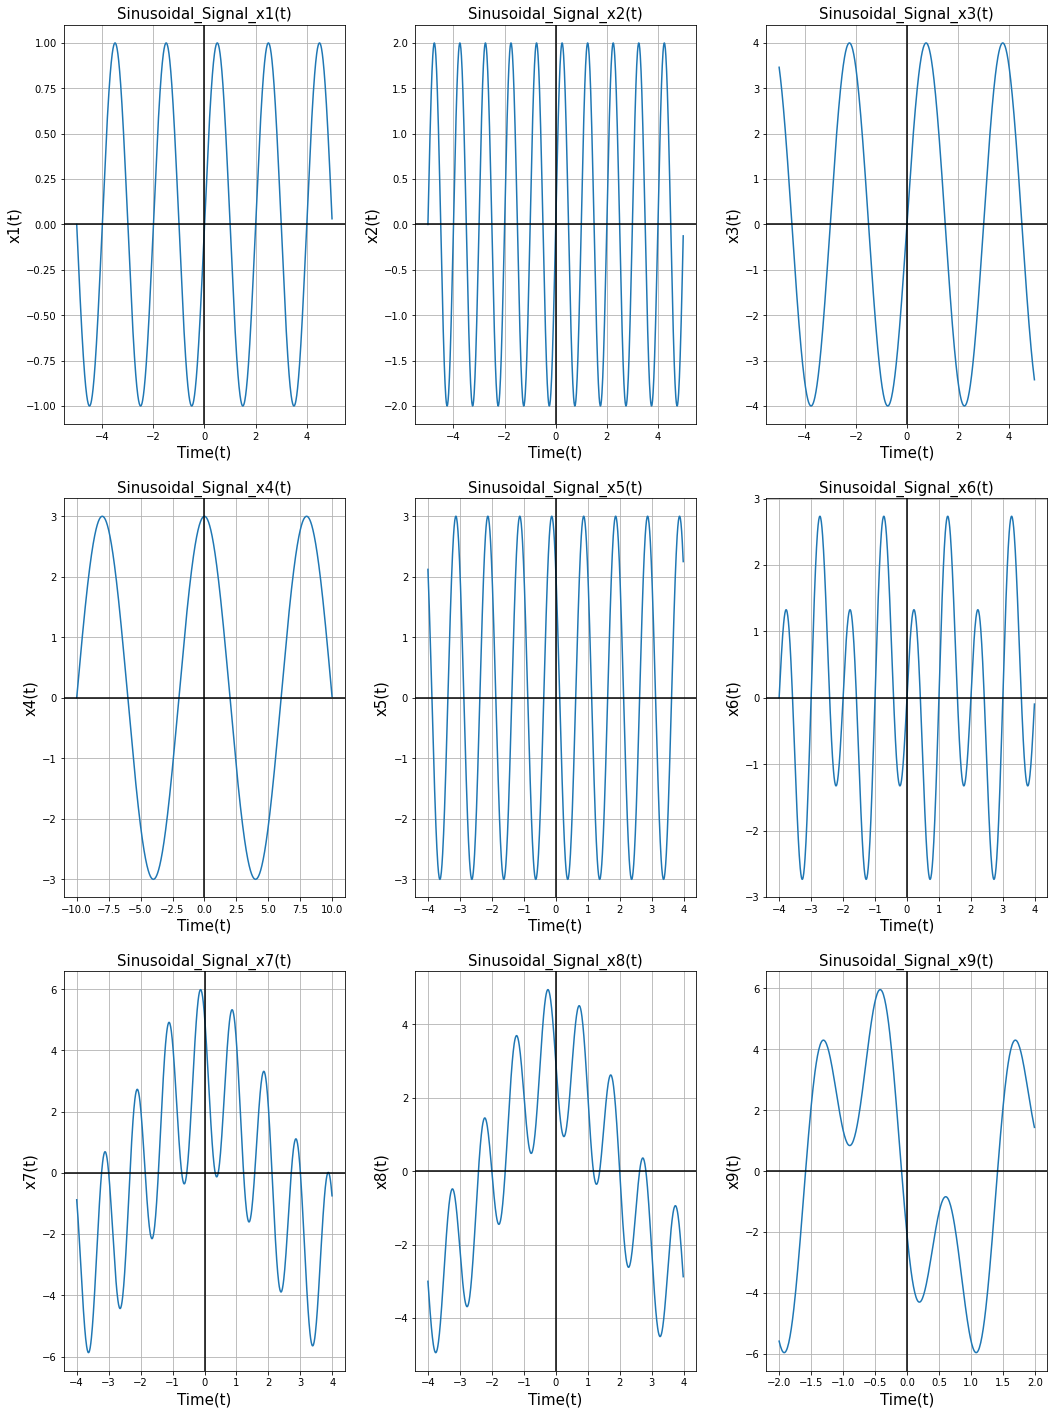

In [12]:
fig, axes = plt.subplots(3,3,figsize=(15, 20));
t = np.arange(-5,5,0.01)

# plotting the sinusoidal function x1(t).
axes[0,0].plot(t,x_1(t))
axes[0,0].set_xlabel('Time(t)',fontsize=15)
axes[0,0].set_ylabel('x1(t)',fontsize=15)
axes[0,0].set_title('Sinusoidal_Signal_x1(t)',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the sinusoidal function x_2(t).
axes[0,1].plot(t,x_2(t))
axes[0,1].set_xlabel('Time(t)',fontsize=15)
axes[0,1].set_ylabel('x2(t)',fontsize=15)
axes[0,1].set_title('Sinusoidal_Signal_x2(t)',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the sinusoidal function x_3(t).
axes[0,2].plot(t,x_3(t))
axes[0,2].set_xlabel('Time(t)',fontsize=15)
axes[0,2].set_ylabel('x3(t)',fontsize=15)
axes[0,2].set_title('Sinusoidal_Signal_x3(t)',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()

# plotting the sinusoidal function x_4(t).
t = np.arange(-10,10,0.01)
axes[1,0].plot(t,x_4(t))
axes[1,0].set_xlabel('Time(t)',fontsize=15)
axes[1,0].set_ylabel('x4(t)',fontsize=15)
axes[1,0].set_title('Sinusoidal_Signal_x4(t)',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the sinusoidal function x_5(t).
t = np.arange(-4,4,0.01)
axes[1,1].plot(t,x_5(t))
axes[1,1].set_xlabel('Time(t)',fontsize=15)
axes[1,1].set_ylabel('x5(t)',fontsize=15)
axes[1,1].set_title('Sinusoidal_Signal_x5(t)',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# plotting the sinusoidal function x_6(t).
t = np.arange(-4,4,0.01)
axes[1,2].plot(t,x_6(t))
axes[1,2].set_xlabel('Time(t)',fontsize=15)
axes[1,2].set_ylabel('x6(t)',fontsize=15)
axes[1,2].set_title('Sinusoidal_Signal_x6(t)',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()

# plotting the sinusoidal function x_7(t).
t = np.arange(-4,4,0.01)
# x7 = x_7(t)
axes[2,0].plot(t,x_7(t))
axes[2,0].set_xlabel('Time(t)',fontsize=15)
axes[2,0].set_ylabel('x7(t)',fontsize=15)
axes[2,0].set_title('Sinusoidal_Signal_x7(t)',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

# plotting the sinusoidal function x_8(t).
t = np.arange(-4,4,0.01)
# x8 = x_8(t)
axes[2,1].plot(t,x_8(t))
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('x8(t)',fontsize=15)
axes[2,1].set_title('Sinusoidal_Signal_x8(t)',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

# plotting the sinusoidal function x_9(t).
t = np.arange(-2,2,0.01)
# x9 = x_9(t)
axes[2,2].plot(t,x_9(t))
axes[2,2].set_xlabel('Time(t)',fontsize=15)
axes[2,2].set_ylabel('x9(t)',fontsize=15)
axes[2,2].set_title('Sinusoidal_Signal_x9(t)',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()
plt.tight_layout(pad=2)

Determine the power and energy of exponential, complex exponential and sinusoidal signals.

![](image_1.jpeg)

![](image_2.jpeg)

![](image_3.jpeg)

![](image3.jpeg)

![](image4.jpeg)

![](image5.jpeg)

# 2. Discrete-time signals

Plot the following signals:

                                     x1[n] = δ[n];

                                     x2[n] = 4δ[3n];

                                     x3[n] = 4δ[3n − 2];

                                     x4[n] = 4δ[n^2 + 3n + 2];

                                     x5[n] = x1[n] + x2[n] + x3[n];

                                     x6[n] = ∑ k=−100......100  δ[n − k]

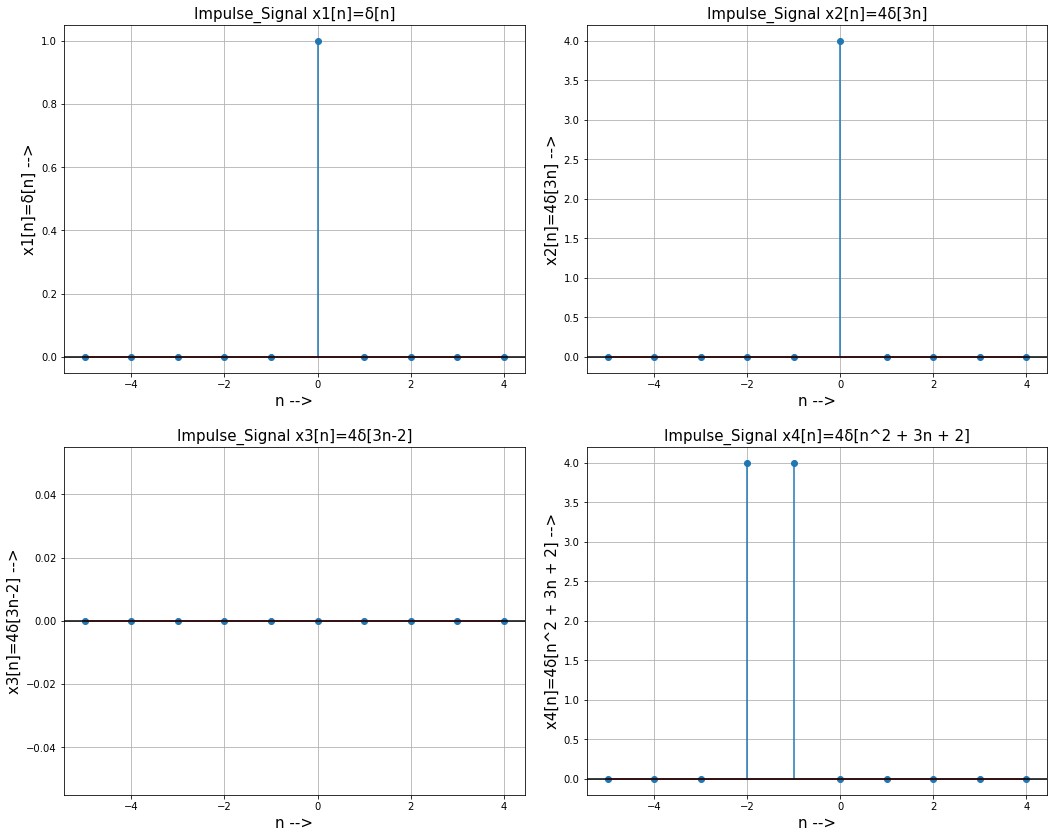

In [13]:
# Defining the function for impulse signal
import matplotlib.pyplot as plt
import numpy as np
def unit_impulse(a,b,n):
    delta =[]
    for sample in n:
        if sample == -b:
            delta.append(a)
        else:
            delta.append(0)
    return delta

fig, axes = plt.subplots(2,2,figsize=(15, 12))
a=1
b=0
n= np.arange(-5,5,1)
ui=unit_impulse(a,b,n)
axes[0,0].stem(n,ui)
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('x1[n]=δ[n] -->',fontsize=15)
axes[0,0].set_title('Impulse_Signal x1[n]=δ[n]',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].grid()
a=4
b=0
n= np.arange(-5,5,1)
ui=unit_impulse(a,b,n/3)
axes[0,1].stem(n,ui)
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('x2[n]=4δ[3n] -->',fontsize=15)
axes[0,1].set_title('Impulse_Signal x2[n]=4δ[3n]',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].grid()
a=4
b=-2
n= np.arange(-5,5,1)
ui=unit_impulse(a,b,n/3)
axes[1,0].stem(n,ui)
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('x3[n]=4δ[3n-2] -->',fontsize=15)
axes[1,0].set_title('Impulse_Signal x3[n]=4δ[3n-2]',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].grid()

a=4
b=0
n= np.arange(-5,5,1)
ui=unit_impulse(a,b,((n**2)+3*n+2))
axes[1,1].stem(n,ui)
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('x4[n]=4δ[n^2 + 3n + 2] -->',fontsize=15)
axes[1,1].set_title('Impulse_Signal x4[n]=4δ[n^2 + 3n + 2]',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].grid()
plt.tight_layout(pad=2)

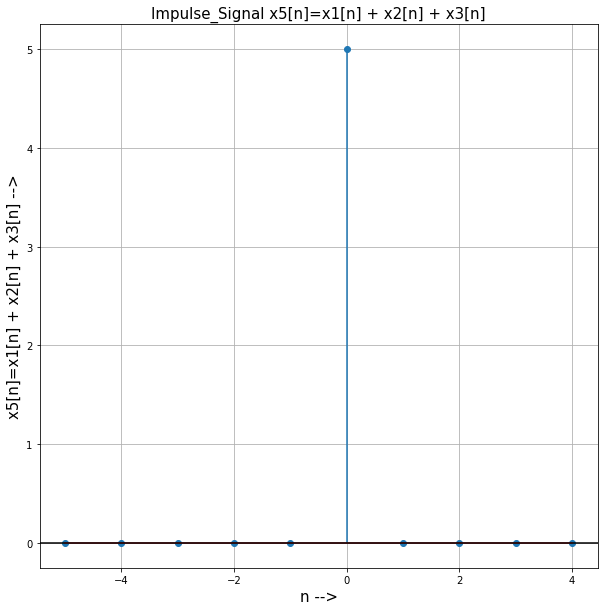

In [14]:
plt.subplots(figsize=(10,10))
a1=1
b1=0
a2=4
b2=0
a3=4
b3=-2
n= np.arange(-5,5,1)
ui1=unit_impulse(a1,b1,n)
ui2=unit_impulse(a2,b2,n/3)
ui3=unit_impulse(a3,b3,n/3)
ui = []
for i in range(len(ui1)):
    ui.append(ui1[i]+ui2[i]+ui3[i])                 
plt.stem(n,ui)
plt.xlabel('n -->',fontsize=15)
plt.ylabel('x5[n]=x1[n] + x2[n] + x3[n] -->',fontsize=15)
plt.title('Impulse_Signal x5[n]=x1[n] + x2[n] + x3[n]',fontsize=15)
plt.axhline(color = "Black")
plt.grid()               


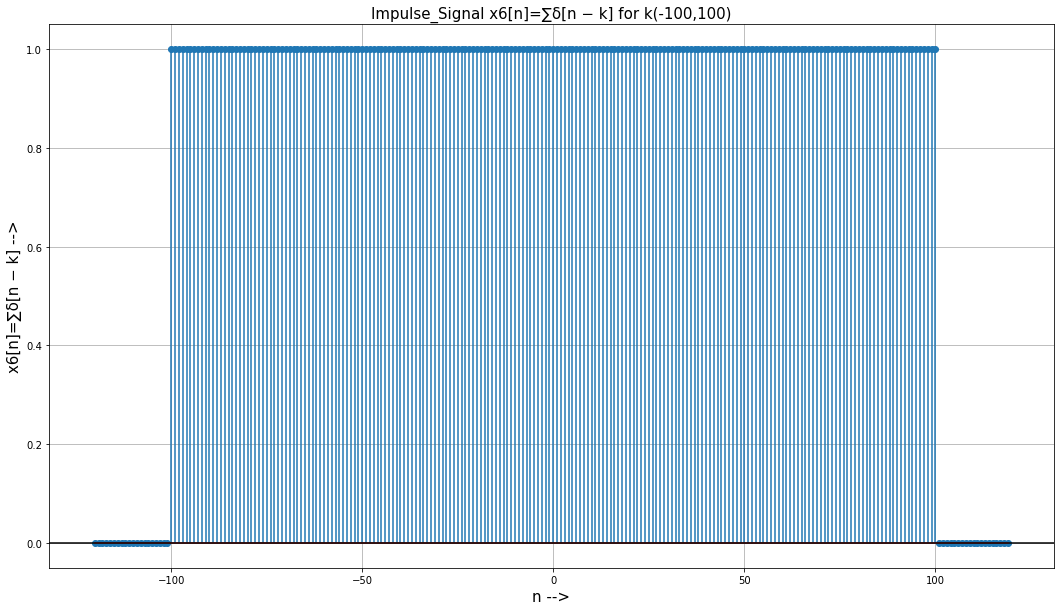

In [15]:
# Defining the function for the shifted delta sequence 
def imp_seq(a,ki,kf,n):
    seq = []
    for sample in n:
        if sample>=ki and sample<=kf:
            seq.append(1)
        else:
            seq.append(0)
    return seq
plt.subplots(figsize=(18,10))
a = 1
ki = -100
kf = 100
n = np.arange(-120,120,1)
plt.stem(n,imp_seq(a,ki,kf,n))
plt.xlabel('n -->',fontsize=15)
plt.ylabel('x6[n]=∑δ[n − k] -->',fontsize=15)
plt.title('Impulse_Signal x6[n]=∑δ[n − k] for k(-100,100)',fontsize=15)
plt.axhline(color = "Black")
plt.grid()

• Plot the discrete-time counter parts of all the signals given in the continuous-time signals section. Replace x(t) by x[n] to plot the discrete-time signals. A discrete-time signal is obtained by sampling a continuous-time signal. For this, you can use the discrete impulse train to sample continuous-time signals in intervals of Ts sec.


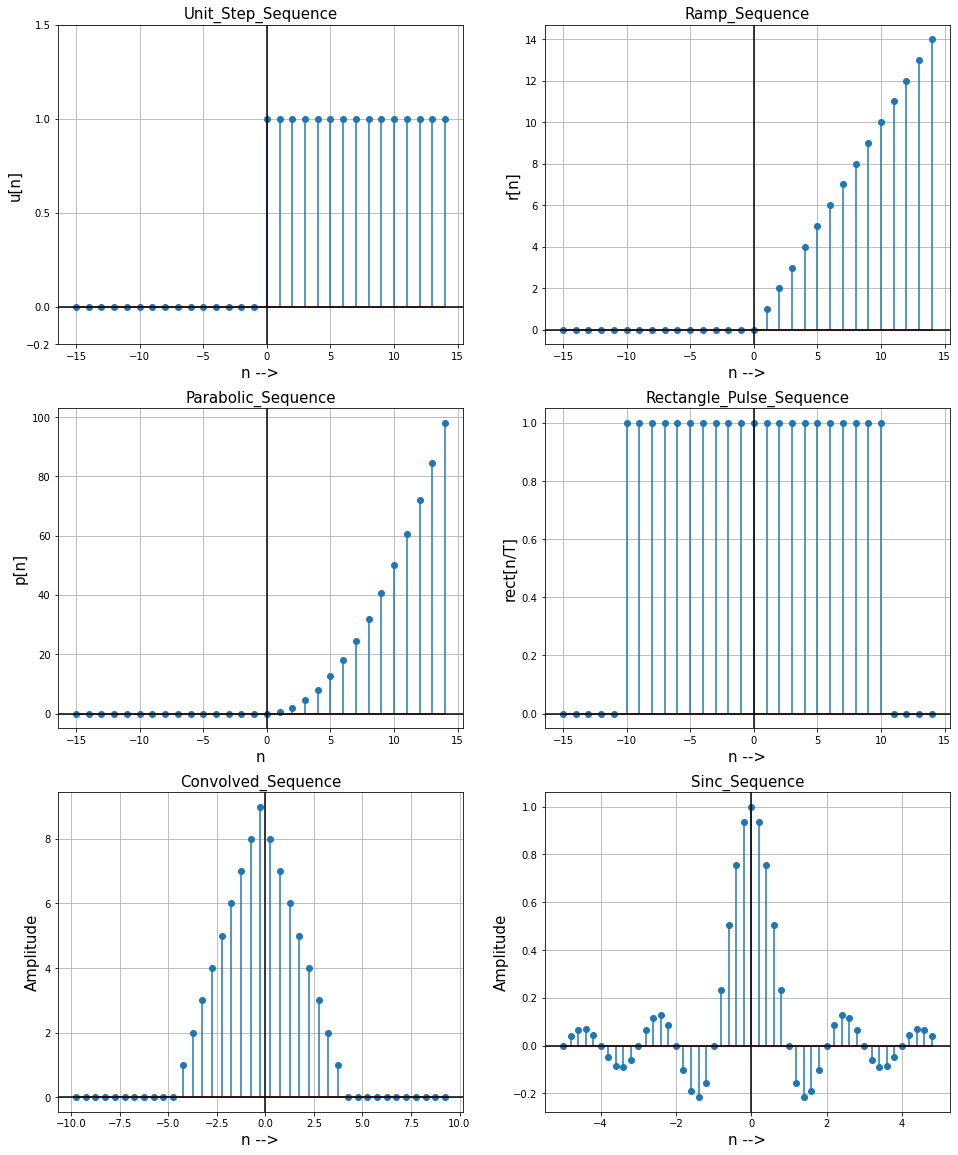

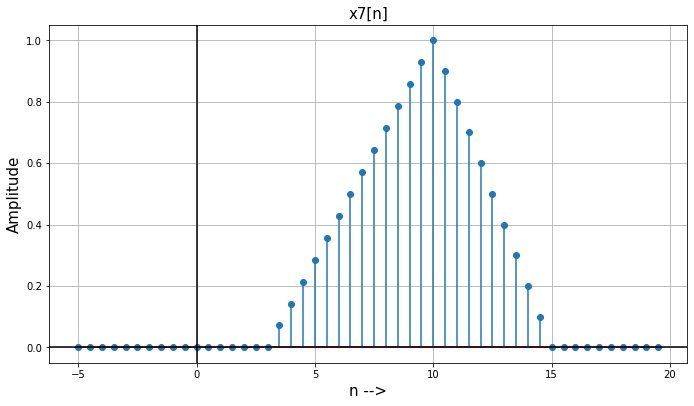

In [16]:
# defining the function to generate unit step sequence u[n].
def step_seq(a,b,n):
    unit =[]
    for sample in n:
        if sample < b:
            unit.append(0)
        else:
            unit.append(a)
    return unit

# defining the function to generate ramp sequence r[n].
def ramp_seq(a,b,n):
    ramp =[]
    for sample in n:
        if sample < b:
            ramp.append(0)
        else:
            ramp.append(a*sample)
    return ramp

# defining the function to generate parabolic sequence p[n].
def parabolic_seq(a,b,n):
    parabolic =[]
    for sample in n:
        if sample < b:
            parabolic.append(0)
        else:
            parabolic.append(a*(((sample)**2)/2))
    return parabolic

# defining the function to generate rectangle pulse seq rect(n/T)
def rect_seq(a,b,n,T):
    rect =[]
    for sample in n:
        if sample < b-T/2:
            rect.append(0)
        elif sample > b+T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

# defining the function to convolute the two seq.
def convolution_1(x1,x2):
    m = len(x1)
    n = len(x2)
    output = []
    for i in range(1,m+1):
        output.append(sum(np.multiply(x1[0:i],x2[n-i:n])))
    for j in range(1,n):
        output.append(sum(np.multiply(x1[j:m],x2[0:n-j])))
    return output

# defining the function to generate sinc sequence sinc[n].
def sinc_seq(n):
    sinc = []
    for sample in n:
        y = np.sin(np.pi*sample)/(np.pi*sample)
        sinc.append(y)
    return sinc

# defining the function to generate sequence.
def x_7(n,d1,d2,d3):
    output = []
    for sample in n:
        if sample < 0:
            output.append(0)
        elif sample >= d1 and sample <= d2:
            output.append((sample-d1)/(d2-d1))
        elif sample > d2 and sample <= d3:
            output.append((d3-sample)/(d3-d2))
        elif sample > d3:
            output.append(0)
        else:
            output.append(0)
    return output

# Plotting the sequences in the single graph

fig, axes = plt.subplots(3,2,figsize=(16, 20))
a = 1
b = 0
n = np.arange(-15,15,1)

# plotting the unit step sequence u[n].
axes[0,0].stem(n,step_seq(a,b,n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u[n]',fontsize=15)
axes[0,0].set_title('Unit_Step_Sequence',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the ramp sequence r[n].
axes[0,1].stem(n,ramp_seq(a,b,n))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('r[n]',fontsize=15)
axes[0,1].set_title('Ramp_Sequence',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the parabolic sequence p[n].
axes[1,0].stem(n,parabolic_seq(a,b,n))
axes[1,0].set_xlabel('n',fontsize=15)
axes[1,0].set_ylabel('p[n]',fontsize=15)
axes[1,0].set_title('Parabolic_Sequence',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the ractangular pulse sequence rect[n/T].
T = 20
axes[1,1].stem(n,rect_seq(a,b,n,T))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('rect[n/T]',fontsize=15)
axes[1,1].set_title('Rectangle_Pulse_Sequence',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# plotting the convolved sequence.
n = np.arange(-5,5,0.5)
T = 4 
n1=np.arange(-9.75,9.75,0.5)
x1 = rect_seq(a,b,n,T)
x2 = rect_seq(a,b,n,T)
axes[2,0].stem(n1,convolution_1(x1,x2))
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('Amplitude',fontsize=15)
axes[2,0].set_title('Convolved_Sequence',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

# plot sinc sequence sinc[n].
n = np.arange(-5,5,0.2)
axes[2,1].stem(n,sinc_seq(n))
axes[2,1].set_xlabel('n -->',fontsize=15)
axes[2,1].set_ylabel('Amplitude',fontsize=15)
axes[2,1].set_title('Sinc_Sequence',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

# plotting the sequence x_7.
plt.subplots(figsize=(10,6))
n = np.arange(-5,20,0.5)
d1 = 3
d2 = 10
d3 = 15 
plt.stem(n,x_7(n,d1,d2,d3))
plt.xlabel('n -->',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('x7[n]',fontsize=15)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.tight_layout(pad=2)

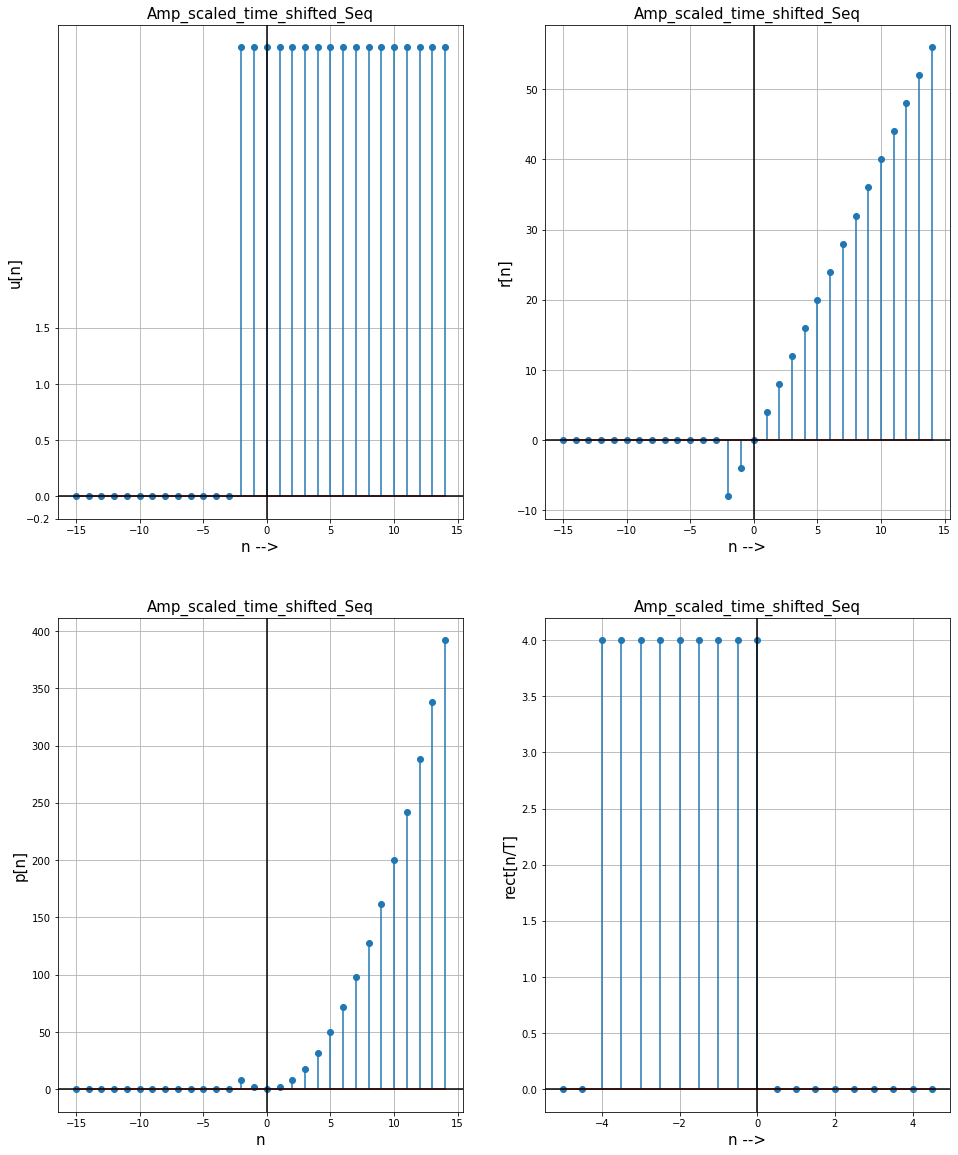

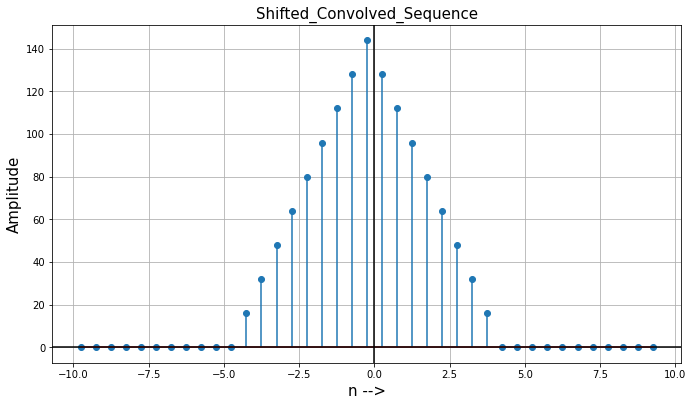

In [17]:
fig, axes = plt.subplots(2,2,figsize=(16, 20))
a = 4
b =-2
n = np.arange(-15,15,1)

# plotting the unit step sequence u[n].
axes[0,0].stem(n,step_seq(a,b,n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u[n]',fontsize=15)
axes[0,0].set_title('Amp_scaled_time_shifted_Seq',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the ramp sequence r[n].
axes[0,1].stem(n,ramp_seq(a,b,n))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('r[n]',fontsize=15)
axes[0,1].set_title('Amp_scaled_time_shifted_Seq',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the parabolic sequence p[n].
axes[1,0].stem(n,parabolic_seq(a,b,n))
axes[1,0].set_xlabel('n',fontsize=15)
axes[1,0].set_ylabel('p[n]',fontsize=15)
axes[1,0].set_title('Amp_scaled_time_shifted_Seq',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the ractangular pulse sequence rect[n/T].
T = 4
n = np.arange(-5,5,0.5)
axes[1,1].stem(n,rect_seq(a,b,n,T))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('rect[n/T]',fontsize=15)
axes[1,1].set_title('Amp_scaled_time_shifted_Seq',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# Plotting the convolved Sequence
plt.subplots(figsize=(10, 6))
T = 4 
n = np.arange(-5,5,0.5)
n1=np.arange(-9.75,9.75,0.5)
x1 = rect_seq(a,b,n,T)
x2 = rect_seq(a,b,n,T)
plt.stem(n1,convolution_1(x1,x2))
plt.xlabel('n -->',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Shifted_Convolved_Sequence',fontsize=15)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.tight_layout(pad=2)

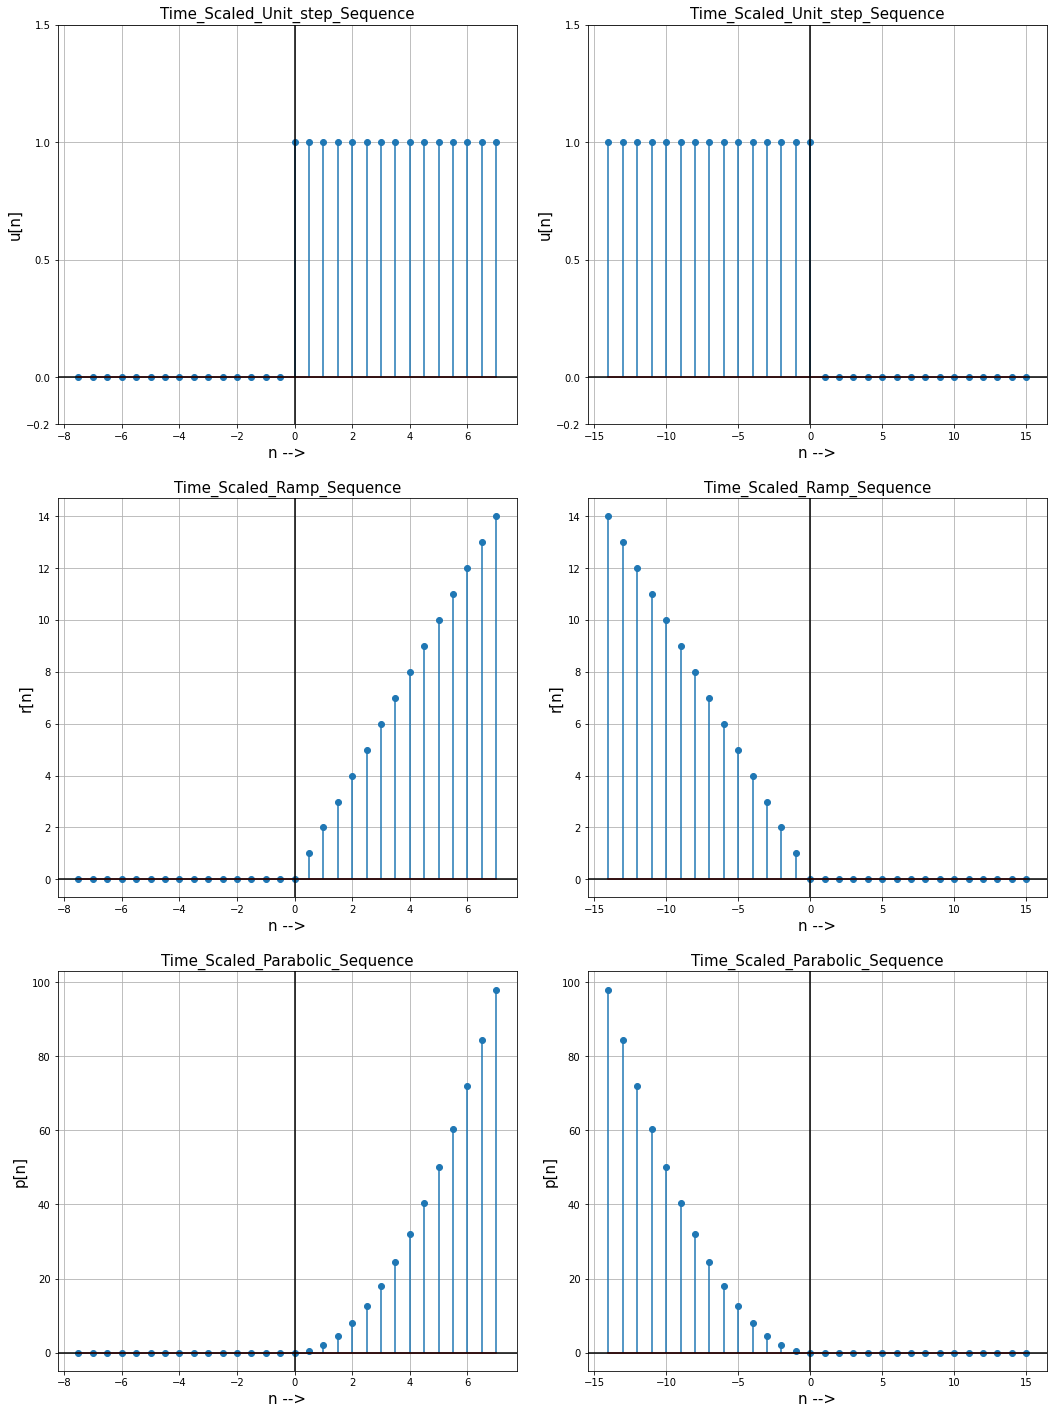

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(3,2,figsize=(15, 20))
# plot time scaled unit step sequence u[n].
a = 1
c = 0.5
b = 0
n = np.arange(-15,15,1)
axes[0,0].stem(c*n,step_seq(a,b,n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u[n]',fontsize=15)
axes[0,0].set_title('Time_Scaled_Unit_step_Sequence',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the time scaled unit step sequence u[n].
c= -1
axes[0,1].stem(c*n,step_seq(a,b,n))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,1].set_ylabel('u[n]',fontsize=15)
axes[0,1].set_title('Time_Scaled_Unit_step_Sequence',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the time scaled ramp sequence r[n].
c = 0.5
axes[1,0].stem(c*n,ramp_seq(a,b,n))
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('r[n]',fontsize=15)
axes[1,0].set_title('Time_Scaled_Ramp_Sequence',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the time scaled ramp function r(n).
c= -1
axes[1,1].stem(c*n,ramp_seq(a,b,n))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('r[n]',fontsize=15)
axes[1,1].set_title('Time_Scaled_Ramp_Sequence',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# plotting the time scaled parabolic  sequence p(n).
c = 0.5
axes[2,0].stem(c*n,parabolic_seq(a,b,n))
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('p[n]',fontsize=15)
axes[2,0].set_title('Time_Scaled_Parabolic_Sequence',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

# plotting the time scaled parabolic  sequence p(n).
c= -1
axes[2,1].stem(c*n,parabolic_seq(a,b,n))
axes[2,1].set_xlabel('n -->',fontsize=15)
axes[2,1].set_ylabel('p[n]',fontsize=15)
axes[2,1].set_title('Time_Scaled_Parabolic_Sequence',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

plt.tight_layout(pad=2);

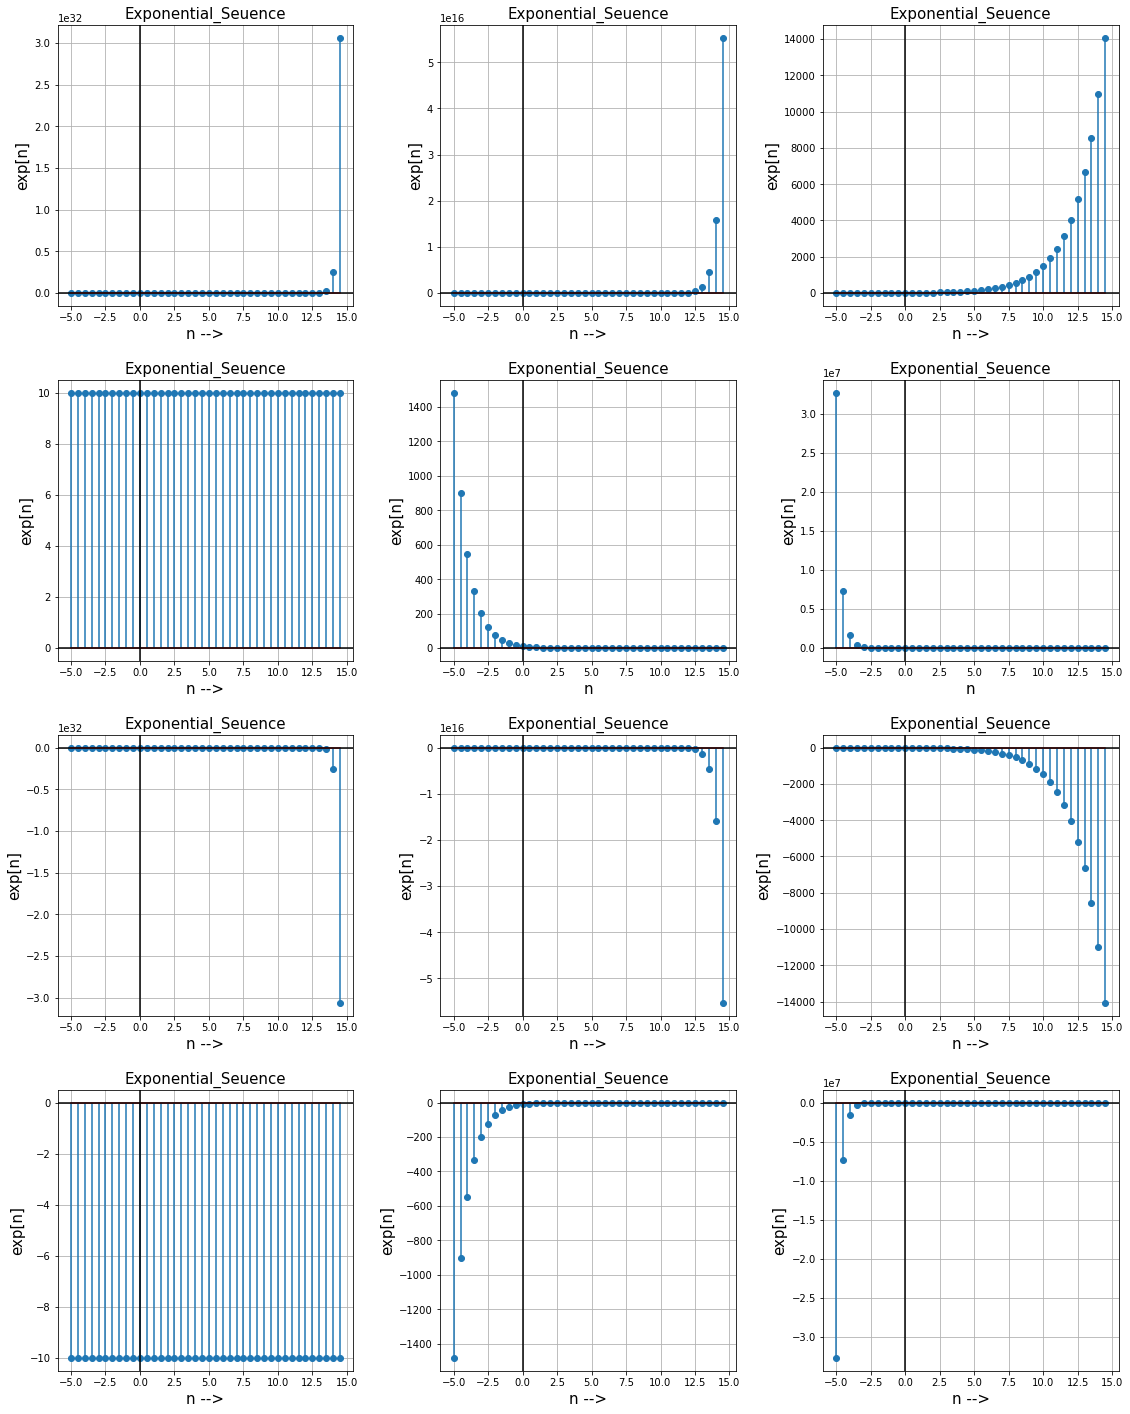

In [19]:
# defining the function to generate exponential sequence.
def expo_seq(A,B,n):
    exponent = []
    for sample in n:
        y = A*np.exp(-B*sample)
        exponent.append(y)
    return exponent

fig, axes = plt.subplots(4,3,figsize=(16, 20))
# plotting the exponential sequence.
A = 10
B = -5
n = np.arange(-5,15,0.5)
axes[0,0].stem(n,expo_seq(A,B,n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('exp[n]',fontsize=15)
axes[0,0].set_title('Exponential_Seuence',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the exponential sequence.
B = -2.5
axes[0,1].stem(n,expo_seq(A,B,n))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('exp[n]',fontsize=15)
axes[0,1].set_title('Exponential_Seuence',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the exponential sequence.
B = -0.5
axes[0,2].stem(n,expo_seq(A,B,n))
axes[0,2].set_xlabel('n -->',fontsize=15)
axes[0,2].set_ylabel('exp[n]',fontsize=15)
axes[0,2].set_title('Exponential_Seuence',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()

# plotting the exponential sequence.
B = 0
axes[1,0].stem(n,expo_seq(A,B,n))
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('exp[n]',fontsize=15)
axes[1,0].set_title('Exponential_Seuence',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the exponential sequence.
B = 1
axes[1,1].stem(n,expo_seq(A,B,n))
axes[1,1].set_xlabel('n',fontsize=15)
axes[1,1].set_ylabel('exp[n]',fontsize=15)
axes[1,1].set_title('Exponential_Seuence',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# plotting the exponential sequence.
B = 3
axes[1,2].stem(n,expo_seq(A,B,n))
axes[1,2].set_xlabel('n',fontsize=15)
axes[1,2].set_ylabel('exp[n]',fontsize=15)
axes[1,2].set_title('Exponential_Seuence',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()

# plotting the exponential sequence.
A = -10
B = -5
axes[2,0].stem(n,expo_seq(A,B,n))
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('exp[n]',fontsize=15)
axes[2,0].set_title('Exponential_Seuence',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

# plotting the exponential sequence.
B = -2.5
axes[2,1].stem(n,expo_seq(A,B,n))
axes[2,1].set_xlabel('n -->',fontsize=15)
axes[2,1].set_ylabel('exp[n]',fontsize=15)
axes[2,1].set_title('Exponential_Seuence',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

# plotting the exponential sequence.
B = -0.5
axes[2,2].stem(n,expo_seq(A,B,n))
axes[2,2].set_xlabel('n -->',fontsize=15)
axes[2,2].set_ylabel('exp[n]',fontsize=15)
axes[2,2].set_title('Exponential_Seuence',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()

# plotting the exponential sequence.
B = 0
axes[3,0].stem(n,expo_seq(A,B,n))
axes[3,0].set_xlabel('n -->',fontsize=15)
axes[3,0].set_ylabel('exp[n]',fontsize=15)
axes[3,0].set_title('Exponential_Seuence',fontsize=15)
axes[3,0].axhline(color = "Black")
axes[3,0].axvline(color = "Black")
axes[3,0].grid()

# plotting the exponential sequence.
B = 1
axes[3,1].stem(n,expo_seq(A,B,n))
axes[3,1].set_xlabel('n -->',fontsize=15)
axes[3,1].set_ylabel('exp[n]',fontsize=15)
axes[3,1].set_title('Exponential_Seuence',fontsize=15)
axes[3,1].axhline(color = "Black")
axes[3,1].axvline(color = "Black")
axes[3,1].grid()

# plotting the exponential sequence.
B = 3
axes[3,2].stem(n,expo_seq(A,B,n))
axes[3,2].set_xlabel('n -->',fontsize=15)
axes[3,2].set_ylabel('exp[n]',fontsize=15)
axes[3,2].set_title('Exponential_Seuence',fontsize=15)
axes[3,2].axhline(color = "Black")
axes[3,2].axvline(color = "Black")
axes[3,2].grid()

plt.tight_layout(pad=2);

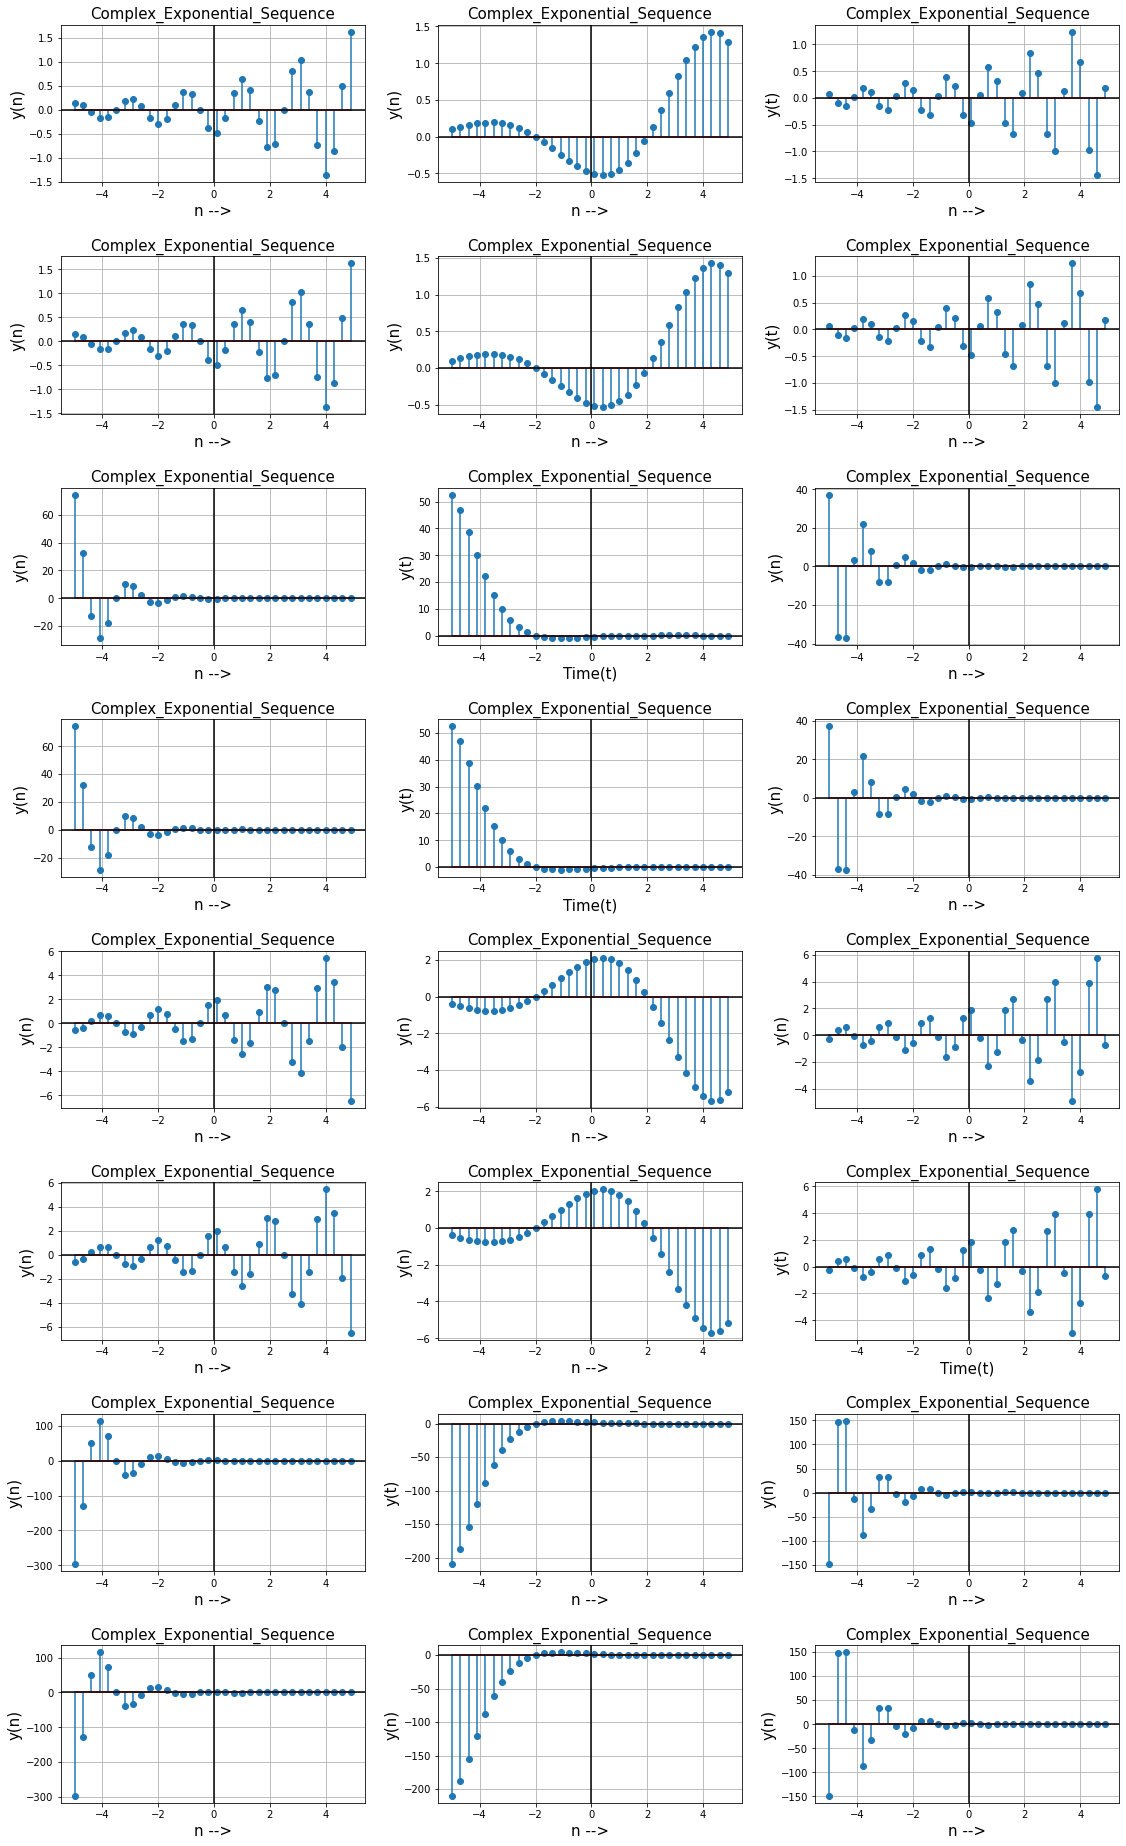

In [20]:
# defining the function to generate complex exponential sequence.
def complex_exponential(α,β,ω,ϕ,n):
    comp_exp = [];
    for sample in n:
        y = α*(np.exp(-β*sample))*np.cos((ω*sample)+ϕ)
        comp_exp.append(y);
    return comp_exp

fig, axes = plt.subplots(8,3,figsize=(16, 26));
# Plotting the Complex exponentials by fixing α=0.5,β=-0.25,ϕ=-π and varying ω
n = np.arange(-5,5,0.3)
α = 0.5
β = -0.25
ϕ = -np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[0,0].stem(n,ce)
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('y(n)',fontsize=15)
axes[0,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[0,1].stem(n,ce)
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('y(n)',fontsize=15)
axes[0,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[0,2].stem(n,ce)
axes[0,2].set_xlabel('n -->',fontsize=15)
axes[0,2].set_ylabel('y(t)',fontsize=15)
axes[0,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()


# Plotting the Complex exponentials by fixing α=0.5,β=-0.25,ϕ=π and varying ω
α = 0.5
β = -0.25
ϕ = np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[1,0].stem(n,ce)
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('y(n)',fontsize=15)
axes[1,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[1,1].stem(n,ce)
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('y(n)',fontsize=15)
axes[1,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[1,2].stem(n,ce)
axes[1,2].set_xlabel('n -->',fontsize=15)
axes[1,2].set_ylabel('y(t)',fontsize=15)
axes[1,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()


# Plotting the Complex exponentials by fixing α=0.5,β=1,ϕ=-π and varying ω
α = 0.5
β = 1
ϕ = -np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[2,0].stem(n,ce)
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('y(n)',fontsize=15)
axes[2,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[2,1].stem(n,ce)
axes[2,1].set_xlabel('Time(t)',fontsize=15)
axes[2,1].set_ylabel('y(t)',fontsize=15)
axes[2,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[2,2].stem(n,ce)
axes[2,2].set_xlabel('n -->',fontsize=15)
axes[2,2].set_ylabel('y(n)',fontsize=15)
axes[2,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()

# Plotting the Complex exponentials by fixing α=0.5,β=1,ϕ=π and varying ω
α = 0.5
β = 1
ϕ = np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[3,0].stem(n,ce)
axes[3,0].set_xlabel('n -->',fontsize=15)
axes[3,0].set_ylabel('y(n)',fontsize=15)
axes[3,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[3,0].axhline(color = "Black")
axes[3,0].axvline(color = "Black")
axes[3,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[3,1].stem(n,ce)
axes[3,1].set_xlabel('Time(t)',fontsize=15)
axes[3,1].set_ylabel('y(t)',fontsize=15)
axes[3,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[3,1].axhline(color = "Black")
axes[3,1].axvline(color = "Black")
axes[3,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[3,2].stem(n,ce)
axes[3,2].set_xlabel('n -->',fontsize=15)
axes[3,2].set_ylabel('y(n)',fontsize=15)
axes[3,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[3,2].axhline(color = "Black")
axes[3,2].axvline(color = "Black")
axes[3,2].grid()


# Plotting the Complex exponentials by fixing α=-2,β=-0.25,ϕ=π and varying ω
α = -2
β = -0.25
ϕ = np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[4,0].stem(n,ce)
axes[4,0].set_xlabel('n -->',fontsize=15)
axes[4,0].set_ylabel('y(n)',fontsize=15)
axes[4,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[4,0].axhline(color = "Black")
axes[4,0].axvline(color = "Black")
axes[4,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[4,1].stem(n,ce)
axes[4,1].set_xlabel('n -->',fontsize=15)
axes[4,1].set_ylabel('y(n)',fontsize=15)
axes[4,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[4,1].axhline(color = "Black")
axes[4,1].axvline(color = "Black")
axes[4,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[4,2].stem(n,ce)
axes[4,2].set_xlabel('n -->',fontsize=15)
axes[4,2].set_ylabel('y(n)',fontsize=15)
axes[4,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[4,2].axhline(color = "Black")
axes[4,2].axvline(color = "Black")
axes[4,2].grid()

# Plotting the Complex exponentials by fixing α=-2,β=-0.25,ϕ=-π and varying ω
α = -2
β = -0.25
ϕ = -np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[5,0].stem(n,ce)
axes[5,0].set_xlabel('n -->',fontsize=15)
axes[5,0].set_ylabel('y(n)',fontsize=15)
axes[5,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[5,0].axhline(color = "Black")
axes[5,0].axvline(color = "Black")
axes[5,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[5,1].stem(n,ce)
axes[5,1].set_xlabel('n -->',fontsize=15)
axes[5,1].set_ylabel('y(n)',fontsize=15)
axes[5,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[5,1].axhline(color = "Black")
axes[5,1].axvline(color = "Black")
axes[5,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[5,2].stem(n,ce)
axes[5,2].set_xlabel('Time(t)',fontsize=15)
axes[5,2].set_ylabel('y(t)',fontsize=15)
axes[5,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[5,2].axhline(color = "Black")
axes[5,2].axvline(color = "Black")
axes[5,2].grid()


# Plotting the Complex exponentials by fixing α=-2,β=1,ϕ=π and varying ω
α = -2
β = 1
ϕ = np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[6,0].stem(n,ce)
axes[6,0].set_xlabel('n -->',fontsize=15)
axes[6,0].set_ylabel('y(n)',fontsize=15)
axes[6,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[6,0].axhline(color = "Black")
axes[6,0].axvline(color = "Black")
axes[6,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[6,1].stem(n,ce)
axes[6,1].set_xlabel('n -->',fontsize=15)
axes[6,1].set_ylabel('y(t)',fontsize=15)
axes[6,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[6,1].axhline(color = "Black")
axes[6,1].axvline(color = "Black")
axes[6,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[6,2].stem(n,ce)
axes[6,2].set_xlabel('n -->',fontsize=15)
axes[6,2].set_ylabel('y(n)',fontsize=15)
axes[6,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[6,2].axhline(color = "Black")
axes[6,2].axvline(color = "Black")
axes[6,2].grid()

# Plotting the Complex exponentials by fixing α=-2,β=1,ϕ=-π and varying ω
α = -2
β = 1
ϕ = -np.pi

ω= np.pi
ce = complex_exponential(α,β,ω,ϕ,n)
axes[7,0].stem(n,ce)
axes[7,0].set_xlabel('n -->',fontsize=15)
axes[7,0].set_ylabel('y(n)',fontsize=15)
axes[7,0].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[7,0].axhline(color = "Black")
axes[7,0].axvline(color = "Black")
axes[7,0].grid()

ω = np.pi/4
ce = complex_exponential(α,β,ω,ϕ,n)
axes[7,1].stem(n,ce)
axes[7,1].set_xlabel('n -->',fontsize=15)
axes[7,1].set_ylabel('y(n)',fontsize=15)
axes[7,1].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[7,1].axhline(color = "Black")
axes[7,1].axvline(color = "Black")
axes[7,1].grid()

ω = 4*np.pi/3
ce = complex_exponential(α,β,ω,ϕ,n)
axes[7,2].stem(n,ce)
axes[7,2].set_xlabel('n -->',fontsize=15)
axes[7,2].set_ylabel('y(n)',fontsize=15)
axes[7,2].set_title('Complex_Exponential_Sequence',fontsize=15)
axes[7,2].axhline(color = "Black")
axes[7,2].axvline(color = "Black")
axes[7,2].grid()

plt.tight_layout(pad=2);


In [21]:
# function to generate real part of complex exponential sequence.
def real_value_function(α,ω,ϕ,n):
    cosine = []
    for sample in n:
        y = α*np.cos((ω*sample)+ϕ)
        cosine.append(y)
    return cosine


# function to generate imaginary part of complex exponential sequence.
def imaginary_value_function(α,ω,ϕ,n):
    sine = []
    for sample in n:
        y = α*np.sin((ω*sample)+ϕ)
        sine.append(y)
    return sine


# function to generate megnitude of complex exponential sequence.
def magnitude_function(α,ω,ϕ,n):
    mag_exp = [];
    for sample in n:
        y = α*(np.exp(1j*((ω*sample)+ϕ)))
        mag_exp.append(y);
    return np.abs(mag_exp)


# function to generate angle of complex exponential sequence.
def angle_function(α,ω,ϕ,n):
    ang_exp = [];
    for sample in n:
        y = α*(np.exp(1j*((ω*sample)+ϕ)))
        ang_exp.append(y);
    return np.angle(ang_exp)


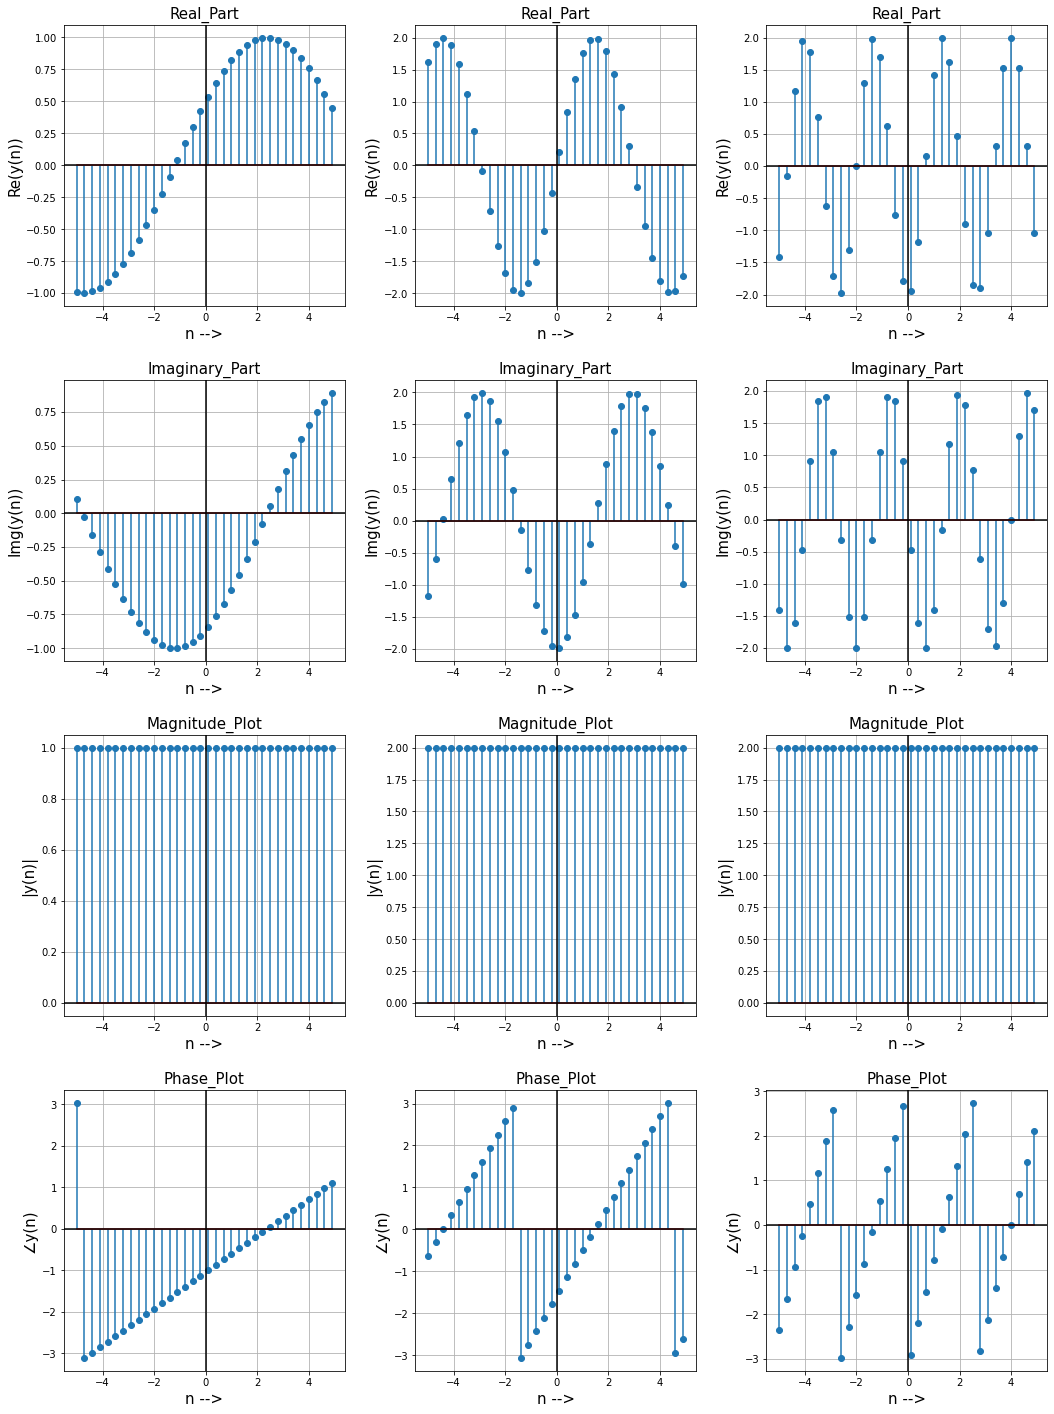

In [22]:
fig, axes = plt.subplots(4,3,figsize=(15, 20));
n = np.arange(-5,5,0.3)
α = 1
ϕ = -np.pi/3
ω= 0.14*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,n)
axes[0,0].stem(n,rvf)
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('Re(y(n))',fontsize=15)
axes[0,0].set_title('Real_Part',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,n)
axes[1,0].stem(n,ivf)
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('Img(y(n))',fontsize=15)
axes[1,0].set_title('Imaginary_Part',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,n)
axes[2,0].stem(n,mf)
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('|y(n)|',fontsize=15)
axes[2,0].set_title('Magnitude_Plot',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,n)
axes[3,0].stem(n,af)
axes[3,0].set_xlabel('n -->',fontsize=15)
axes[3,0].set_ylabel('∠y(n)',fontsize=15)
axes[3,0].set_title('Phase_Plot',fontsize=15)
axes[3,0].axhline(color = "Black")
axes[3,0].axvline(color = "Black")
axes[3,0].grid()


α = 2
ϕ = -np.pi/2
ω= 0.34*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,n)
axes[0,1].stem(n,rvf)
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('Re(y(n))',fontsize=15)
axes[0,1].set_title('Real_Part',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,n)
axes[1,1].stem(n,ivf)
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('Img(y(n))',fontsize=15)
axes[1,1].set_title('Imaginary_Part',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,n)
axes[2,1].stem(n,mf)
axes[2,1].set_xlabel('n -->',fontsize=15)
axes[2,1].set_ylabel('|y(n)|',fontsize=15)
axes[2,1].set_title('Magnitude_Plot',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,n)
axes[3,1].stem(n,af)
axes[3,1].set_xlabel('n -->',fontsize=15)
axes[3,1].set_ylabel('∠y(n)',fontsize=15)
axes[3,1].set_title('Phase_Plot',fontsize=15)
axes[3,1].axhline(color = "Black")
axes[3,1].axvline(color = "Black")
axes[3,1].grid()


α = 2
ϕ = np.pi
ω= 0.75*np.pi

# Plotting Real part of complex exponential function.
rvf= real_value_function(α,ω,ϕ,n)
axes[0,2].stem(n,rvf)
axes[0,2].set_xlabel('n -->',fontsize=15)
axes[0,2].set_ylabel('Re(y(n))',fontsize=15)
axes[0,2].set_title('Real_Part',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()

# Plotting Imaginary part of complex exponential function.
ivf = imaginary_value_function(α,ω,ϕ,n)
axes[1,2].stem(n,ivf)
axes[1,2].set_xlabel('n -->',fontsize=15)
axes[1,2].set_ylabel('Img(y(n))',fontsize=15)
axes[1,2].set_title('Imaginary_Part',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()


# Plotting Magnitude of complex exponential function.
mf = magnitude_function(α,ω,ϕ,n)
axes[2,2].stem(n,mf)
axes[2,2].set_xlabel('n -->',fontsize=15)
axes[2,2].set_ylabel('|y(n)|',fontsize=15)
axes[2,2].set_title('Magnitude_Plot',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()


# plotting Angle of complex exponential function.
af = angle_function(α,ω,ϕ,n)
axes[3,2].stem(n,af)
axes[3,2].set_xlabel('n -->',fontsize=15)
axes[3,2].set_ylabel('∠y(n)',fontsize=15)
axes[3,2].set_title('Phase_Plot',fontsize=15)
axes[3,2].axhline(color = "Black")
axes[3,2].axvline(color = "Black")
axes[3,2].grid()
plt.tight_layout(pad=2)

In [23]:
# defining a function to generate sinusoidal signal.
def x_1(n):
    x1 = []
    for sample in n:
        y = np.sin(np.pi*sample)
        x1.append(y)
    return x1

# defining a function to generate sinusoidal signal.
def x_2(n):
    x2 = []
    for sample in n:
        y = 2*np.sin(2*np.pi*sample)
        x2.append(y)
    return x2

# defining a function to generate sinusoidal signal.
def x_3(t):
    x3 = []
    for sample in t:
        y = 4*np.sin(2*np.pi*sample/3)
        x3.append(y)
    return x3

# defining a function to generate sinusoidal signal.
def x_4(n):
    x4 = []
    for sample in n:
        y = 3*np.cos(np.pi*sample/4)
        x4.append(y)
    return x4

# defining a function to generate sinusoidal signal.
def x_5(n):
    x5 = []
    for sample in n:
        y = 3*np.cos((2*np.pi*sample)+(np.pi/4))
        x5.append(y)
    return x5

# defining a function to generate sinusoidal signal.
def x_6(n):
    x6 = []
    x1 = x_1(-n) 
    x2 = x_2(n)
    for i in range(len(x1)):
        x6.append(x1[i]+x2[i])
    return x6

# defining a function to generate sinusoidal signal.
def x_7(n):
    x7 = []
    x4 = x_4(n) 
    x5 = x_5(n)
    for i in range(len(x4)):
        x7.append(x4[i]+x5[i])
    return x7

# defining a function to generate sinusoidal signal.
def x_8(n):
    x8 = []
    x2 = x_2(-n) 
    x4 = x_4(n)
    for i in range(len(x2)):
        x8.append(x2[i]+x4[i])
    return x8

# defining a function to generate sinusoidal signal.
def x_9(n):
    x9 = []
    x3 = x_3(-n) 
    x5 = x_5(-n)
    for i in range(len(x3)):
        x9.append(x3[i]-x5[i])
    return x9

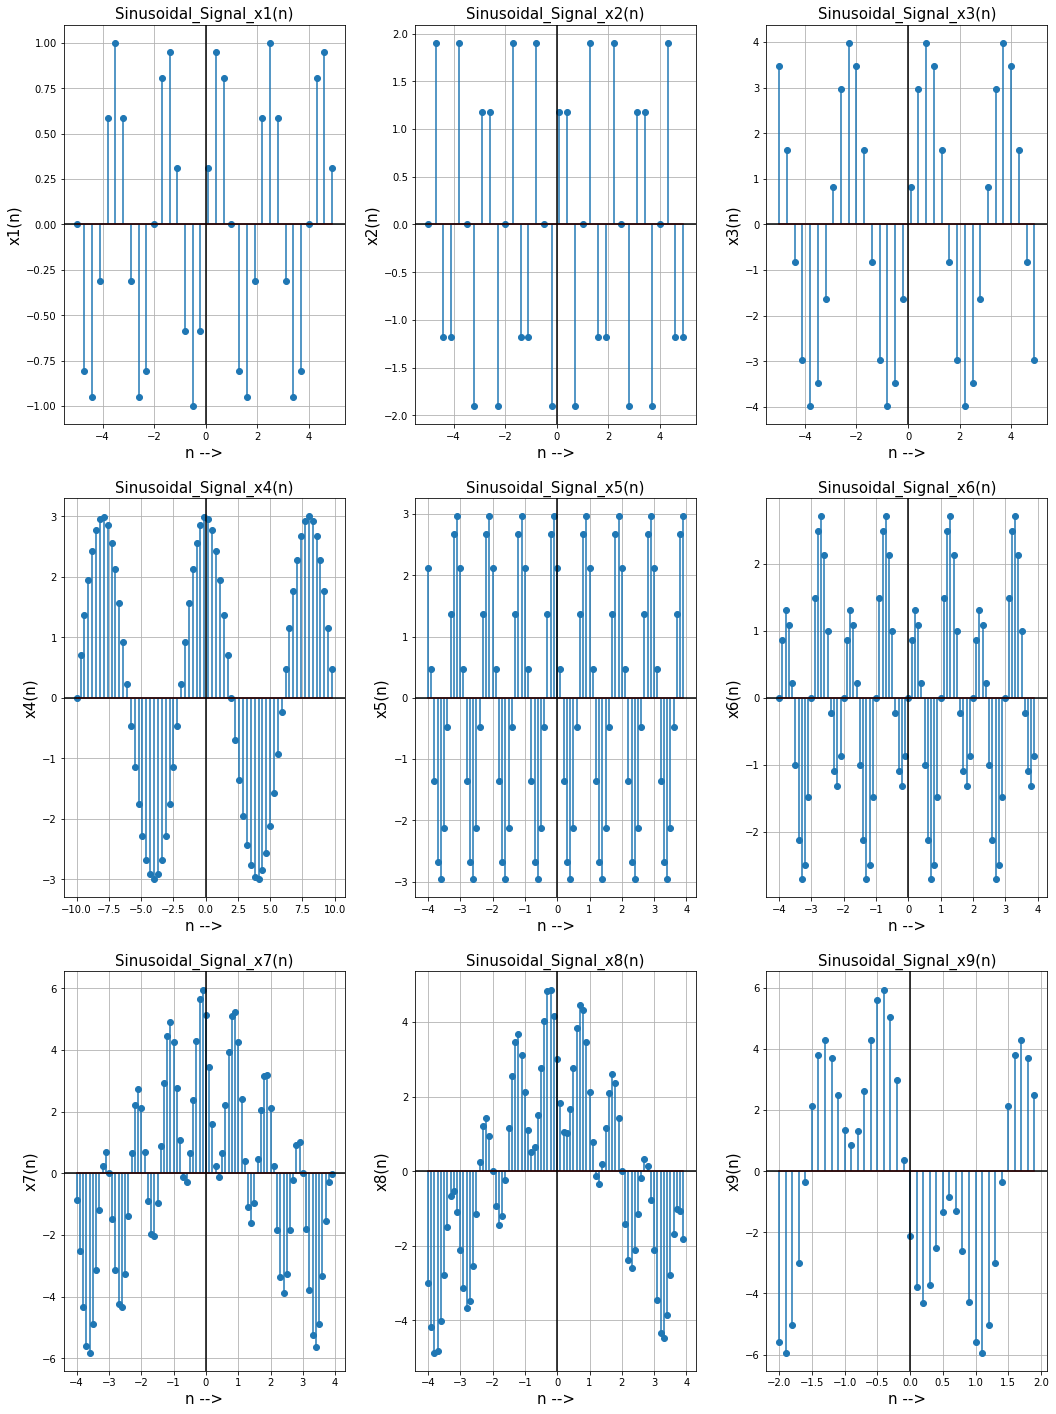

In [24]:
fig, axes = plt.subplots(3,3,figsize=(15, 20));
n = np.arange(-5,5,0.3)

# plotting the sinusoidal function x1(n).
axes[0,0].stem(n,x_1(n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('x1(n)',fontsize=15)
axes[0,0].set_title('Sinusoidal_Signal_x1(n)',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].axvline(color = "Black")
axes[0,0].grid()

# plotting the sinusoidal function x_2(n).
axes[0,1].stem(n,x_2(n))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('x2(n)',fontsize=15)
axes[0,1].set_title('Sinusoidal_Signal_x2(n)',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].axvline(color = "Black")
axes[0,1].grid()

# plotting the sinusoidal function x_3(n).
axes[0,2].stem(n,x_3(n))
axes[0,2].set_xlabel('n -->',fontsize=15)
axes[0,2].set_ylabel('x3(n)',fontsize=15)
axes[0,2].set_title('Sinusoidal_Signal_x3(n)',fontsize=15)
axes[0,2].axhline(color = "Black")
axes[0,2].axvline(color = "Black")
axes[0,2].grid()

# plotting the sinusoidal function x_4(n).
n = np.arange(-10,10,0.3)
axes[1,0].stem(n,x_4(n))
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('x4(n)',fontsize=15)
axes[1,0].set_title('Sinusoidal_Signal_x4(n)',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].axvline(color = "Black")
axes[1,0].grid()

# plotting the sinusoidal function x_5(n).
n = np.arange(-4,4,0.1)
axes[1,1].stem(n,x_5(n))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('x5(n)',fontsize=15)
axes[1,1].set_title('Sinusoidal_Signal_x5(n)',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].axvline(color = "Black")
axes[1,1].grid()

# plotting the sinusoidal function x_6(n).
n = np.arange(-4,4,0.1)
axes[1,2].stem(n,x_6(n))
axes[1,2].set_xlabel('n -->',fontsize=15)
axes[1,2].set_ylabel('x6(n)',fontsize=15)
axes[1,2].set_title('Sinusoidal_Signal_x6(n)',fontsize=15)
axes[1,2].axhline(color = "Black")
axes[1,2].axvline(color = "Black")
axes[1,2].grid()

# plotting the sinusoidal function x_7(n).
n = np.arange(-4,4,0.1)
axes[2,0].stem(n,x_7(n))
axes[2,0].set_xlabel('n -->',fontsize=15)
axes[2,0].set_ylabel('x7(n)',fontsize=15)
axes[2,0].set_title('Sinusoidal_Signal_x7(n)',fontsize=15)
axes[2,0].axhline(color = "Black")
axes[2,0].axvline(color = "Black")
axes[2,0].grid()

# plotting the sinusoidal function x_8(n).
n = np.arange(-4,4,0.1)
axes[2,1].stem(n,x_8(n))
axes[2,1].set_xlabel('n -->',fontsize=15)
axes[2,1].set_ylabel('x8(n)',fontsize=15)
axes[2,1].set_title('Sinusoidal_Signal_x8(n)',fontsize=15)
axes[2,1].axhline(color = "Black")
axes[2,1].axvline(color = "Black")
axes[2,1].grid()

# plotting the sinusoidal function x_9(t).
n = np.arange(-2,2,0.1)
axes[2,2].stem(n,x_9(n))
axes[2,2].set_xlabel('n -->',fontsize=15)
axes[2,2].set_ylabel('x9(n)',fontsize=15)
axes[2,2].set_title('Sinusoidal_Signal_x9(n)',fontsize=15)
axes[2,2].axhline(color = "Black")
axes[2,2].axvline(color = "Black")
axes[2,2].grid()
plt.tight_layout(pad=2)

• In continuous-time domain, the impulse function, unit step function, ramp function, and parabolic function are related by the differentiation operation. That is if we differentiate ramp function we get unit step function and so on.
Is there any such relation in the discrete-time domain? If yes, how will you implement ramp function from parabolic function, unit step function from ramp function, and impulse function from unit step function in the discrete-time domain.

In [25]:
# defining the function to generate difference equation.
def diff_equat(x):
    diff = []
    for i in range(len(x)):
        if i == 0:
            diff.append(0)
        else:
            diff.append(x[i]-x[i-1])
    return diff

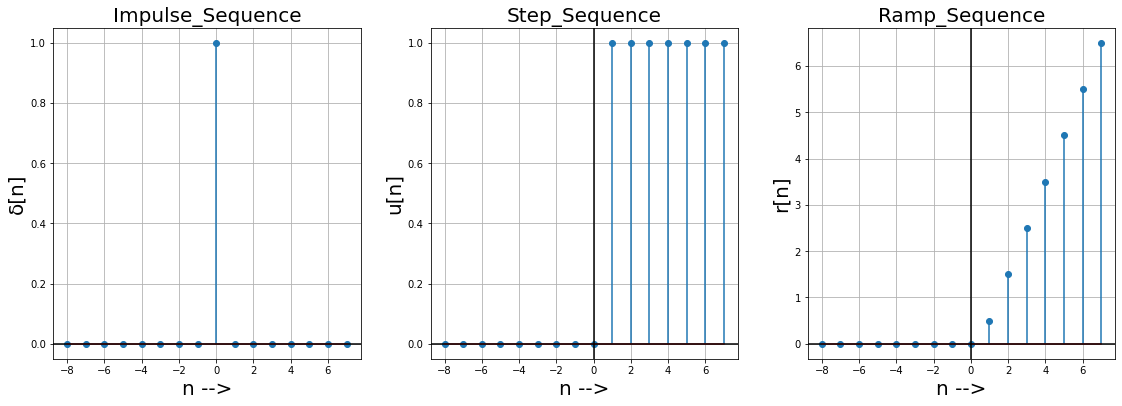

In [26]:
fig, axes = plt.subplots(1,3,figsize=(16, 6));

# plotting the impulse sequence using unit step sequence.
a = 1
b = 0
n = np.arange(-8,8,1)
axes[0].stem(n,diff_equat(step_seq(a,b,n)))
axes[0].set_xlabel('n -->',fontsize=20)
axes[0].set_ylabel('δ[n]',fontsize=20)
axes[0].set_title('Impulse_Sequence',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# plotting the unit step sequence using ramp sequence.
axes[1].stem(n,diff_equat(ramp_seq(a,b,n)))
axes[1].set_xlabel('n -->',fontsize=20)
axes[1].set_ylabel('u[n]',fontsize=20)
axes[1].set_title('Step_Sequence',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].axvline(color = "Black");
axes[1].grid()
             
# plotting the ramp sequence using parabolic sequence.
axes[2].stem(n,diff_equat(parabolic_seq(a,b,n)))
axes[2].set_xlabel('n -->',fontsize=20)
axes[2].set_ylabel('r[n]',fontsize=20)
axes[2].set_title('Ramp_Sequence',fontsize=20)
axes[2].axhline(color = "Black");
axes[2].axvline(color = "Black");
axes[2].grid()

plt.tight_layout(pad=2);


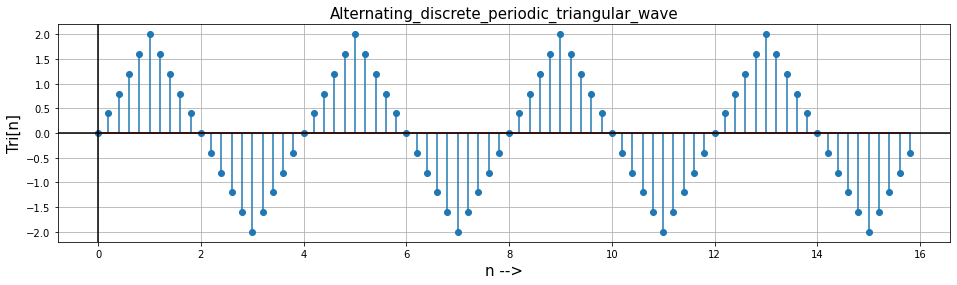

In [27]:
# defining the function to generate triangle sequence.
def triangle_wave(a,n,UL,LL,SS,p):
    triangle = []
    temp = UL - LL
    T = temp/p
    for i in range(p):
        t1 = np.arange(LL,LL+T,SS)
        for sample in t1:
            if abs(sample) <= T/4:
                triangle.append(a*sample)
            elif abs(sample) > T/4 and abs(sample) <= T/2:
                triangle.append((a*T/2)-(a*sample))
            elif abs(sample) > T/2 and abs(sample) <= 3*T/4:
                triangle.append(((a*T/2)-(a*sample)))
            else:
                triangle.append(-((a*T)-(a*sample)))
    return triangle  

# plotting the alternating periodic trinagular sequence
plt.subplots(figsize=(16,4))
a = 2
UL = 16
LL = 0
SS = 0.2
p = 4
n = np.arange(0,16,0.2)
tri=triangle_wave(a,n,UL,LL,SS,p)
plt.stem(n,tri)
plt.xlabel('n -->',fontsize=15)
plt.ylabel('Tri[n]',fontsize=15)
plt.title('Alternating_discrete_periodic_triangular_wave',fontsize=15)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()

# 3. LTI Systems


Let x[n] be the input to an linear-time invariant (LTI) system and h[n] be the impulse response. The output of a discrete LTI system in terms of the impulse response is characterized by the equation as

                            y[n] = x[n] ∗ h[n] 

                                 = ∑ k=−∞......∞  x[k]h[n − k]

Write a function for performing convolution of two sequences. By using this function, calculate the output for the following sequences:

(i) x[n] = {3, 5, 2, 6, 8} and h[n] = {−2, 4, 1}

(ii) x[n] = {2, 3, 4, 7, 1} and h[−n] = {−2, 4, 1}

For (i) and (ii), plot x[n], h[n], and y[n] on a single subplot.

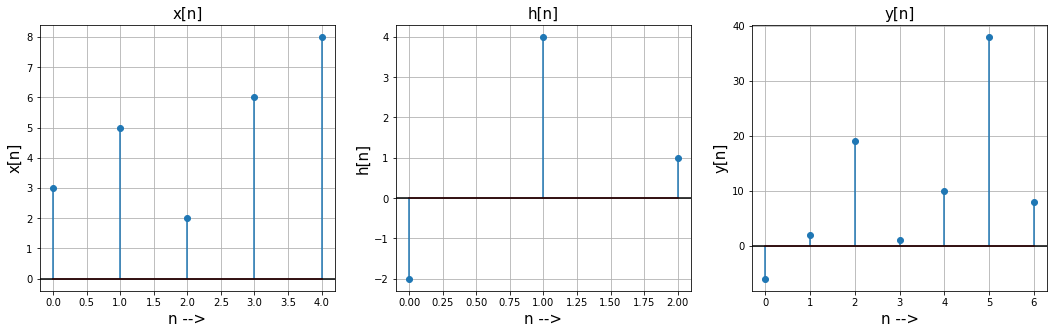

In [28]:
# defining the function to convolve two sequences.

def convolution(x1,x2):
    result = []
    x3 = []
    for i in range(len(x2)):
        x3.append(x1*x2[i])
    temp = len(x3)
    for i in range(len(x3)):
        for j in range(len(x3)-1-i):
            x3[i] = np.insert(x3[i],len(x3[i]),0)
    for i in range(len(x3)):
        for j in range(i):
            x3[i] = np.insert(x3[i],0,0)
    for i in range(len(x3[0])):
        add = 0
        for j in range(len(x3)):
            add+=x3[j][i]
        result.append(add)
    return result


fig, axes = plt.subplots(1,3,figsize=(15, 5))

a = np.array([3,5,2,6,8])
n1 = np.arange(0,len(a),1) 
axes[0].stem(n1,a)
axes[0].set_xlabel('n -->',fontsize=15)
axes[0].set_ylabel('x[n]',fontsize=15)
axes[0].set_title('x[n]',fontsize=15)
axes[0].axhline(color = "Black")
axes[0].grid()

b = np.array([-2,4,1])
n2 = np.arange(0,len(b),1) 
axes[1].stem(n2,b)
axes[1].set_xlabel('n -->',fontsize=15)
axes[1].set_ylabel('h[n]',fontsize=15)
axes[1].set_title('h[n]',fontsize=15)
axes[1].axhline(color = "Black")
axes[1].grid()

c = convolution(a,b)
n3 = np.arange(0,len(c),1)
axes[2].stem(n3,c)
axes[2].set_xlabel('n -->',fontsize=15)
axes[2].set_ylabel('y[n]',fontsize=15)
axes[2].set_title('y[n]',fontsize=15)
axes[2].axhline(color = "Black")
axes[2].grid()
plt.tight_layout(pad=2)


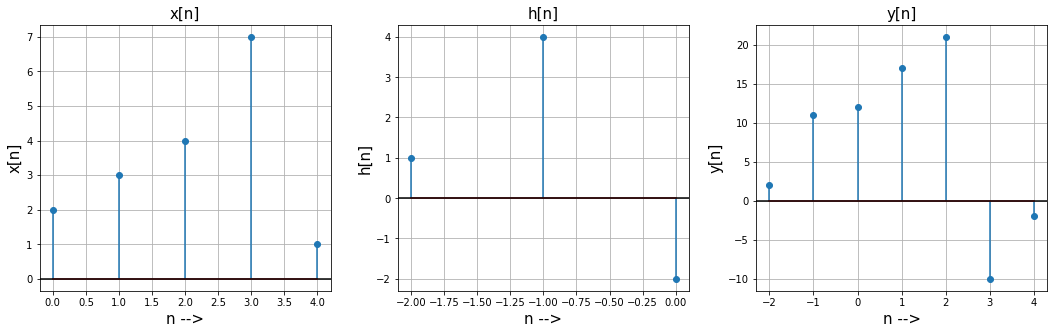

In [29]:
fig, axes = plt.subplots(1,3,figsize=(15, 5))

a = np.array([2,3,4,7,1])
n1 = np.arange(0,len(a),1) 
axes[0].stem(n1,a)
axes[0].set_xlabel('n -->',fontsize=15)
axes[0].set_ylabel('x[n]',fontsize=15)
axes[0].set_title('x[n]',fontsize=15)
axes[0].axhline(color = "Black")
axes[0].grid()

b = np.array([-2,4,1])
n2 = np.arange(0,len(b),1) 
axes[1].stem(-n2,b)
axes[1].set_xlabel('n -->',fontsize=15)
axes[1].set_ylabel('h[n]',fontsize=15)
axes[1].set_title('h[n]',fontsize=15)
axes[1].axhline(color = "Black")
axes[1].grid()

c = convolution(a,np.flip(b))
n3 = np.arange(-2,len(c)-2,1)
axes[2].stem(n3,c)
axes[2].set_xlabel('n -->',fontsize=15)
axes[2].set_ylabel('y[n]',fontsize=15)
axes[2].set_title('y[n]',fontsize=15)
axes[2].axhline(color = "Black")
axes[2].grid()
plt.tight_layout(pad=2)

Calculate the impulse response for y[n] = 3x[n − 1] and find the response of the system to the following inputs: unit step function u[n], ramp function r[n], parabolic function p[n], and complex exponential e(2+j3)n. Plot the input signals and their responses. Plot the real and imaginary part of the response for complex exponential input. Do you observe any pattern in the input and response of complex exponential signal?

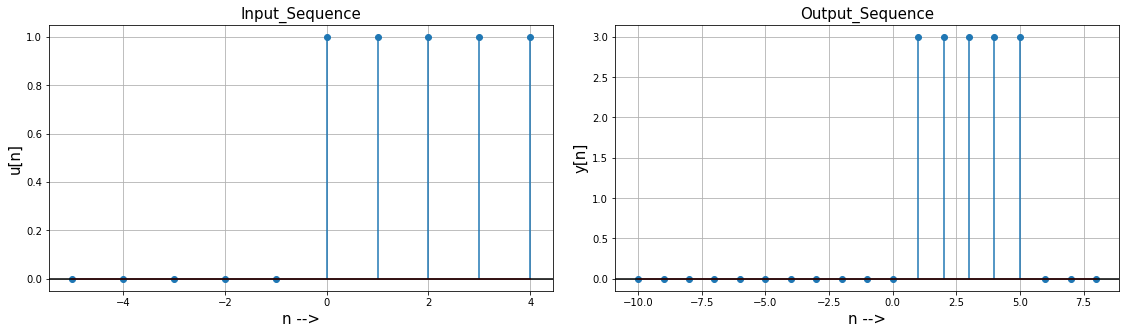

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16, 5))
n = np.arange(-5,5,1)
h = unit_impulse(3,-1,n) # unit impulse of the system
n1= np.arange(-10,9,1)

# plotting the input Sequence.
axes[0].stem(n,step_seq(1,0,n))
axes[0].set_xlabel('n -->',fontsize=15)
axes[0].set_ylabel('u[n]',fontsize=15)
axes[0].set_title('Input_Sequence',fontsize=15)
axes[0].axhline(color = "Black")
axes[0].grid()

# plotting the output Sequence.
axes[1].stem(n1,convolution(np.array(h),np.array(step_seq(1,0,n))))
axes[1].set_xlabel('n -->',fontsize=15)
axes[1].set_ylabel('y[n]',fontsize=15)
axes[1].set_title('Output_Sequence',fontsize=15)
axes[1].axhline(color = "Black")
axes[1].grid()
plt.tight_layout(pad=2)


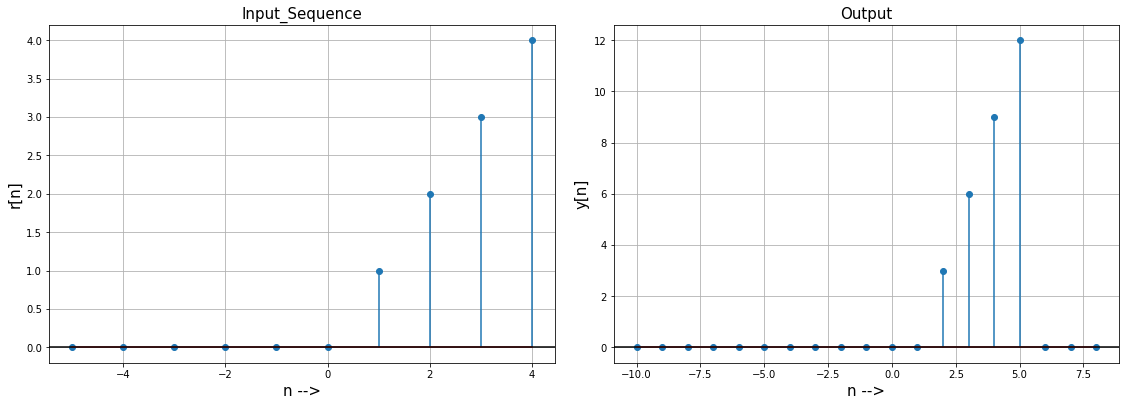

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16, 6));
n = np.arange(-5,5,1)
n1= np.arange(-10,9,1)

# plotting the input Sequence.
axes[0].stem(n,ramp_seq(1,0,n))
axes[0].set_xlabel('n -->',fontsize=15)
axes[0].set_ylabel('r[n]',fontsize=15)
axes[0].set_title('Input_Sequence',fontsize=15)
axes[0].axhline(color = "Black")
axes[0].grid()

# plot the output
axes[1].stem(n1,convolution(np.array(h),np.array(ramp_seq(1,0,n))))
axes[1].set_xlabel('n -->',fontsize=15)
axes[1].set_ylabel('y[n]',fontsize=15)
axes[1].set_title('Output',fontsize=15)
axes[1].axhline(color = "Black")
axes[1].grid()
plt.tight_layout(pad=2)

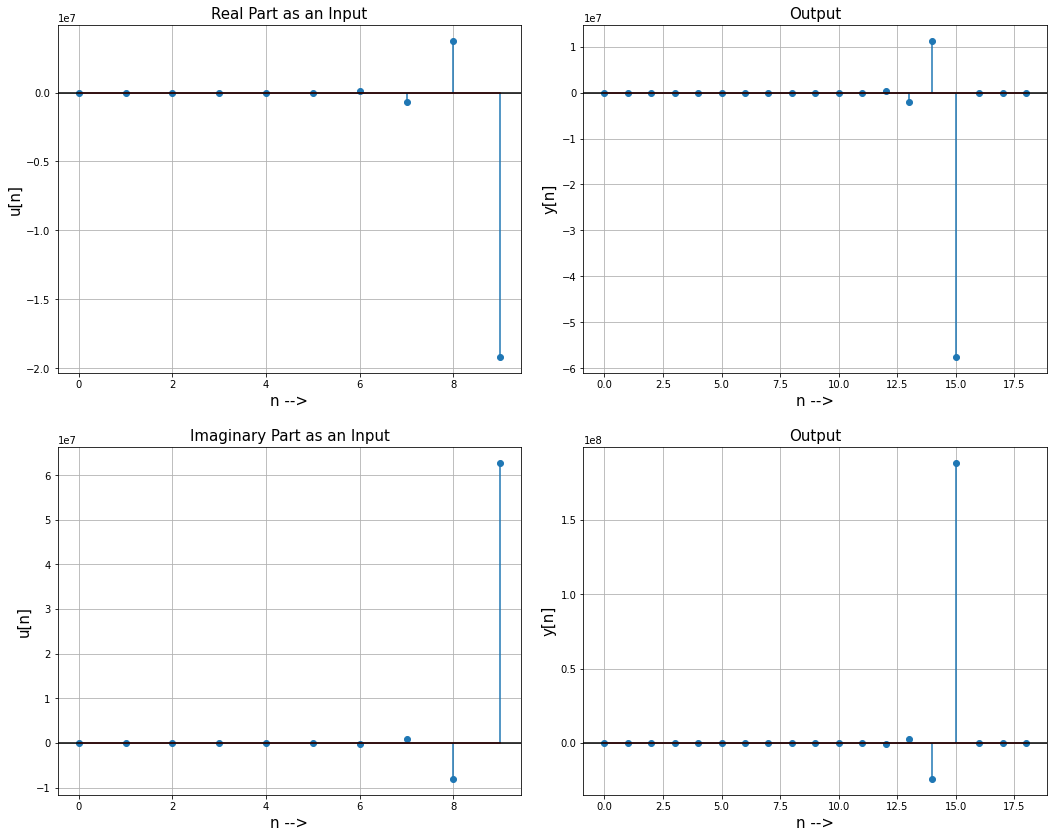

In [33]:
# defining the function for real part of complex exponential sequence.
def comp_exp_real(a,b,n):
    c_e_r =[]
    for sample in n:
        y = np.exp(a*sample)*np.cos(b*sample)
        c_e_r.append(y)
    return c_e_r

# defining the function for imaginary part of complex exponential sequence.
def comp_exp_img(a,b,n):
    c_e_i =[]
    for sample in n:
        y = np.exp(a*sample)*np.sin(b*sample)
        c_e_i.append(y)
    return c_e_i

n = np.arange(0,10,1)
n1= np.arange(0,19,1)
a = 2
b = 3
fig, axes = plt.subplots(2,2,figsize=(15, 12))

# plotting the real part of complex exponential sequence.
axes[0,0].stem(n,comp_exp_real(a,b,n))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('u[n]',fontsize=15)
axes[0,0].set_title('Real Part as an Input',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].grid()

# plotting the convolved sequence.
axes[0,1].stem(n1,convolution(np.array(h),np.array(comp_exp_real(a,b,n))))
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('y[n]',fontsize=15)
axes[0,1].set_title('Output',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].grid()

# plotting the imaginary part of complex exponential sequence.
axes[1,0].stem(n,comp_exp_img(a,b,n))
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('u[n]',fontsize=15)
axes[1,0].set_title('Imaginary Part as an Input',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].grid()

# plotting the convolved sequence.
axes[1,1].stem(n1,convolution(np.array(h),np.array(comp_exp_img(a,b,n))))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('y[n]',fontsize=15)
axes[1,1].set_title('Output',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].grid()
plt.tight_layout(pad=2)

Consider an input x[n] and a unit impulse response h[n] given by

                                 x[n] = (1/3)^-n u[-n-1]

                                 h[n] = u[n-1]

Determine and plot the output

                                 y[n] = x[n]*h[n]

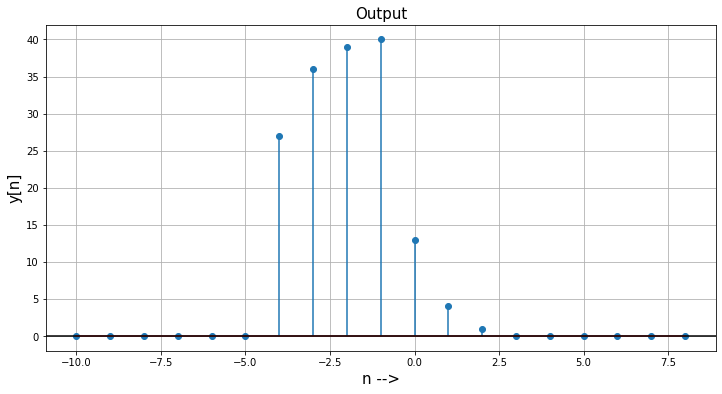

In [34]:
# defining the function to generate step sequence u[n].
def step_sample(a,b,n):
    unit =[]
    for sample in n:
        if sample < b:
            unit.append(0)
        else:
            unit.append(int(a**(-sample+b)))
    return unit

# plot the output response of the system
plt.subplots(figsize=(12,6))
a1 = 1
a2 = 1/3
b1 = 1
b2 = 1
n = np.arange(-5,5,1)
h = step_seq(a1,b1,n)
x = step_sample(a2,b2,n)
n1 = np.arange(-10,9,1)
out = convolution(np.array(h),np.flip(x))
plt.stem(n1,out)
plt.xlabel('n -->',fontsize=15)
plt.ylabel('y[n]',fontsize=15)
plt.title('Output',fontsize=15)
plt.axhline(color = "Black")
plt.grid()

Consider the first-order difference equation:

                                  y[n]+2y[n−1] = x[n]. 

Assuming the condition of initial rest (i.e., if x[n] = 0 for n < n0, then y[n] = 0 for n < n0), find the impulse response of a system whose input and output are related by this difference equation.

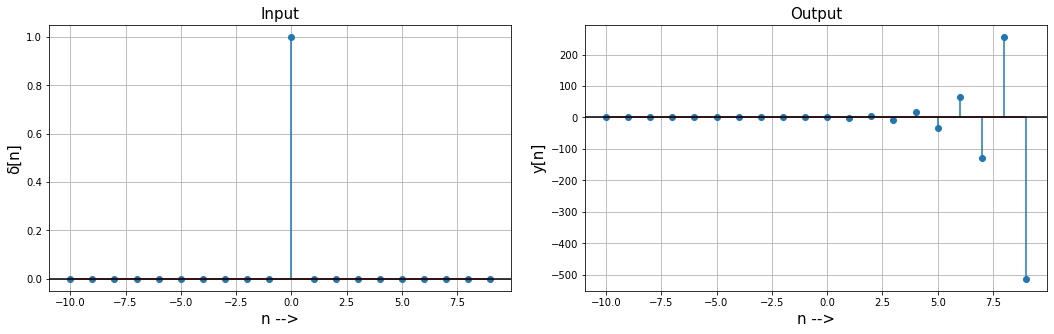

In [35]:
# defining the function to generate the system reponse. 
def diff_equn(x):
    diff = []
    for i in range(len(x)):
        if i == 0:
            diff.append(0)
        else:
            diff.append(x[i]-2*diff[i-1])
    return diff

fig, axes = plt.subplots(1,2,figsize=(15, 5));

n = np.arange(-10,10,1)

# Plotting the input Sequence.
axes[0].stem(n,unit_impulse(1,0,n))
axes[0].set_xlabel('n -->',fontsize=15)
axes[0].set_ylabel('δ[n]',fontsize=15)
axes[0].set_title('Input',fontsize=15)
axes[0].axhline(color = "Black")
axes[0].grid()

# Plotting the system response.
axes[1].stem(n,diff_equn(unit_impulse(1,0,n)))
axes[1].set_xlabel('n -->',fontsize=15)
axes[1].set_ylabel('y[n]',fontsize=15)
axes[1].set_title('Output',fontsize=15)
axes[1].axhline(color = "Black")
axes[1].grid()
plt.tight_layout(pad=2)

Consider the evaluation of

                            y[n] = x1[n] ∗ x2[n] ∗ x3[n], 

where x1 = (0.5)nu[n], x2 = u[n + 3], x3 = δ[n] − δ[n − 1].

(i) Evaluate the convolution x1[n] ∗ x2[n].

(ii) Convolve the result of part (i) with x3[n] in order to evaluate y[n].

(iii) Evaluate the convolution x2[n] ∗ x3[n].

(iv) Convolve the result of part (iii) with x1[n] in order to evaluate y[n].

Plot the signals.

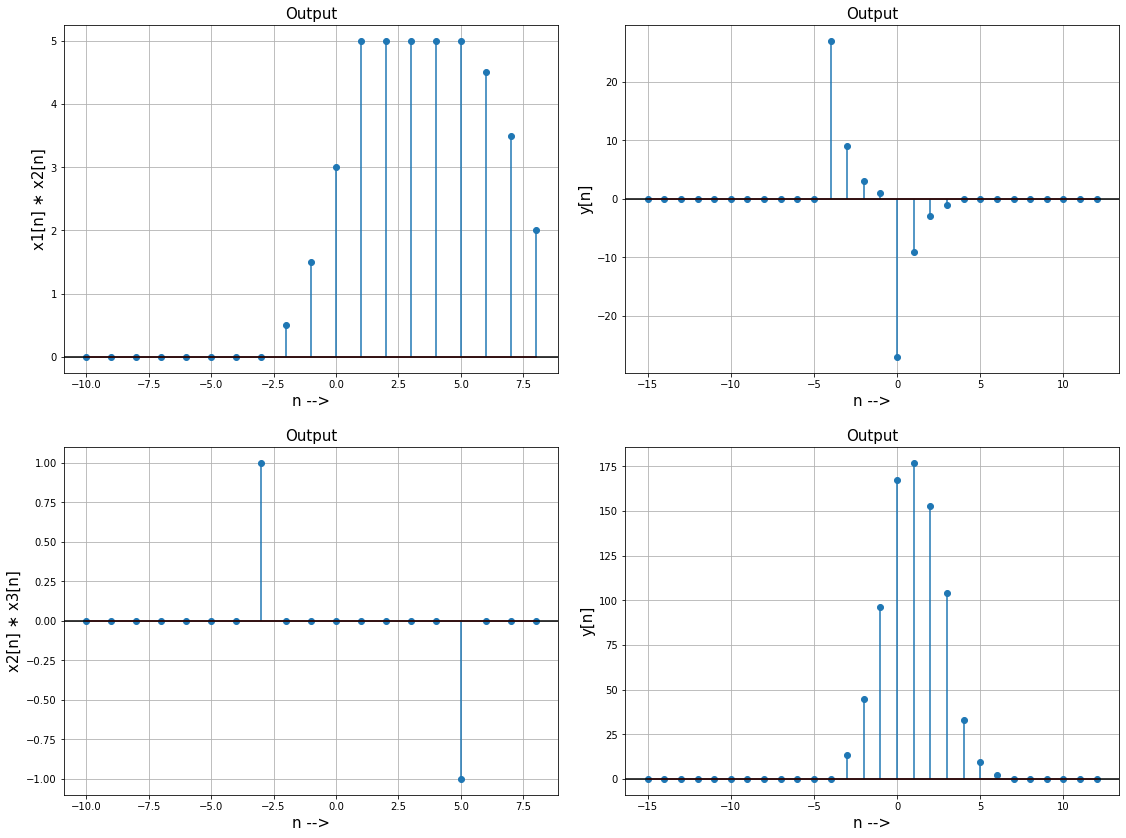

In [36]:
n = np.arange(-5,5,1)
n1 = np.arange(-10,9,1)
n2 = np.arange(-15,13,1)

# Generating the sequence x1[n].
a1 = 0.5
c1 = 0
x1 = ramp_seq(a1,c1,n)

# Generating the sequence x1[n].
a2 = 1
c2 = -3
x2 = step_seq(a2,c2,n)

# Generating the sequence x1[n].
a3 = 1
c3 = -1
temp_1 = unit_impulse(a3,c1,n)
temp_2 = unit_impulse(a3,c3,n)
x3 = []
for i in range(len(temp_1)):
    x3.append(temp_1[i]-temp_2[i])
    
fig, axes = plt.subplots(2,2,figsize=(16, 12))

# plotting the convolution of x1[n] and x2[n].
axes[0,0].stem(n1,convolution(np.array(x1),np.array(x2)))
axes[0,0].set_xlabel('n -->',fontsize=15)
axes[0,0].set_ylabel('x1[n] ∗ x2[n]',fontsize=15)
axes[0,0].set_title('Output',fontsize=15)
axes[0,0].axhline(color = "Black")
axes[0,0].grid()

# plot the convolved sequence y[n].
y = convolution(np.array(out),np.array(x3))
axes[0,1].stem(n2,y)
axes[0,1].set_xlabel('n -->',fontsize=15)
axes[0,1].set_ylabel('y[n]',fontsize=15)
axes[0,1].set_title('Output',fontsize=15)
axes[0,1].axhline(color = "Black")
axes[0,1].grid()

# plot the convolution of x2[n] and x3[n].
axes[1,0].stem(n1,convolution(np.array(x2),np.array(x3)))
axes[1,0].set_xlabel('n -->',fontsize=15)
axes[1,0].set_ylabel('x2[n] ∗ x3[n]',fontsize=15)
axes[1,0].set_title('Output',fontsize=15)
axes[1,0].axhline(color = "Black")
axes[1,0].grid()

# plot the convolved sequence y[n].
axes[1,1].stem(n2,convolution(np.array(out),np.array(x1)))
axes[1,1].set_xlabel('n -->',fontsize=15)
axes[1,1].set_ylabel('y[n]',fontsize=15)
axes[1,1].set_title('Output',fontsize=15)
axes[1,1].axhline(color = "Black")
axes[1,1].grid()
plt.tight_layout(pad=2)